In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from catboost import CatBoostClassifier, cv, Pool

//anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
data = pd.read_csv("train.csv")

In [3]:
lb = LabelEncoder()
data['Embarked'] = lb.fit_transform(data['Embarked'].astype(str))
data['Sex'] = lb.fit_transform(data['Sex'].astype(str))
data['Cabin'] = lb.fit_transform(data['Cabin'].astype(str))
data = data.fillna(data.median())

In [4]:
full_data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin']]
#full_data = data[['Sex', 'Age']]
full_sur = data[['Survived']]
type(full_sur)

pandas.core.frame.DataFrame

In [5]:
train, test, train_sur, test_sur = train_test_split(full_data, full_sur, train_size=0.70, test_size=0.30)

In [6]:
##Random forest
clf = RandomForestClassifier()
forest_params = {
#'n_estimators': np.arange(10,20),
'min_samples_leaf': np.arange(1,10),
'max_depth': range(1,10)
    }
forest_grid = GridSearchCV(clf, forest_params, cv=30)
forest_grid.fit(train, train_sur)
print(forest_grid.best_params_)
print(forest_grid.best_score_)
print(forest_grid.score(test, test_sur))


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 

{'max_depth': 9, 'min_samples_leaf': 5}
0.8234349919743178
0.8022388059701493


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

In [7]:
print("NB Accuracy: "+repr(round(forest_grid.score(test, test_sur) * 100, 2)) + "%")
result_rf=cross_val_score(clf,train,train_sur,cv=10)
print('The cross validated score for GNB is:',round(result_rf.mean()*100,2))

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

NB Accuracy: 80.22%


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

The cross validated score for GNB is: 79.77


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [8]:

gbm_param_grid = {
    'n_estimators': range(8, 20),
    'max_depth': range(6, 10),
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}
gbm = XGBClassifier(n_estimators=10)
xgb_random = GridSearchCV(gbm, param_grid=gbm_param_grid, cv = 3, verbose=10)

xgb_random.fit(train, train_sur)
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)
c1 = xgb_random.refit_time_
print(c1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remainin

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits
[CV] colsample_bytree=0.6, learning_rate=0.4, max_depth=6, n_estimators=8 
[CV]  colsample_bytree=0.6, learning_rate=0.4, max_depth=6, n_estimators=8, score=0.770, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.4, max_depth=6, n_estimators=8 
[CV]  colsample_bytree=0.6, learning_rate=0.4, max_depth=6, n_estimators=8, score=0.802, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.4, max_depth=6, n_estimators=8 
[CV]  colsample_bytree=0.6, learning_rate=0.4, max_depth=6, n_estimators=8, score=0.792, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.4, max_depth=6, n_estimators=9 
[CV]  colsample_bytree=0.6, learning_rate=0.4, max_depth=6, n_estimators=9, score=0.804, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.4, max_depth=6, n_estimators=9 
[CV]  colsample_bytree=0.6, learning_rate=0.4, max_depth=6, n_estimators=9, score=0.797, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.4,

[CV]  colsample_bytree=0.6, learning_rate=0.4, max_depth=7, n_estimators=14, score=0.739, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.4, max_depth=7, n_estimators=15 
[CV]  colsample_bytree=0.6, learning_rate=0.4, max_depth=7, n_estimators=15, score=0.785, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.4, max_depth=7, n_estimators=15 
[CV]  colsample_bytree=0.6, learning_rate=0.4, max_depth=7, n_estimators=15, score=0.797, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.4, max_depth=7, n_estimators=15 
[CV]  colsample_bytree=0.6, learning_rate=0.4, max_depth=7, n_estimators=15, score=0.758, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.4, max_depth=7, n_estimators=16 
[CV]  colsample_bytree=0.6, learning_rate=0.4, max_depth=7, n_estimators=16, score=0.785, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.4, max_depth=7, n_estimators=16 
[CV]  colsample_bytree=0.6, learning_rate=0.4, max_depth=7, n_estimators=16, score=0.812, total=   0

[CV]  colsample_bytree=0.6, learning_rate=0.4, max_depth=8, n_estimators=19, score=0.778, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.4, max_depth=9, n_estimators=8 
[CV]  colsample_bytree=0.6, learning_rate=0.4, max_depth=9, n_estimators=8, score=0.785, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.4, max_depth=9, n_estimators=8 
[CV]  colsample_bytree=0.6, learning_rate=0.4, max_depth=9, n_estimators=8, score=0.792, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.4, max_depth=9, n_estimators=8 
[CV]  colsample_bytree=0.6, learning_rate=0.4, max_depth=9, n_estimators=8, score=0.783, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.4, max_depth=9, n_estimators=9 
[CV]  colsample_bytree=0.6, learning_rate=0.4, max_depth=9, n_estimators=9, score=0.785, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.4, max_depth=9, n_estimators=9 
[CV]  colsample_bytree=0.6, learning_rate=0.4, max_depth=9, n_estimators=9, score=0.797, total=   0.0s
[CV] c

[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=6, n_estimators=14, score=0.799, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.45, max_depth=6, n_estimators=14 
[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=6, n_estimators=14, score=0.821, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.45, max_depth=6, n_estimators=14 
[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=6, n_estimators=14, score=0.758, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.45, max_depth=6, n_estimators=15 
[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=6, n_estimators=15, score=0.785, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.45, max_depth=6, n_estimators=15 
[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=6, n_estimators=15, score=0.826, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.45, max_depth=6, n_estimators=15 
[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=6, n_estimators=15, score=0.758,

[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=8, n_estimators=8, score=0.797, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.45, max_depth=8, n_estimators=8 
[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=8, n_estimators=8, score=0.783, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.45, max_depth=8, n_estimators=9 
[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=8, n_estimators=9, score=0.794, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.45, max_depth=8, n_estimators=9 
[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=8, n_estimators=9, score=0.783, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.45, max_depth=8, n_estimators=9 
[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=8, n_estimators=9, score=0.787, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.45, max_depth=8, n_estimators=10 
[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=8, n_estimators=10, score=0.799, total=  

[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=9, n_estimators=15, score=0.789, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.45, max_depth=9, n_estimators=15 
[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=9, n_estimators=15, score=0.792, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.45, max_depth=9, n_estimators=15 
[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=9, n_estimators=15, score=0.778, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.45, max_depth=9, n_estimators=16 
[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=9, n_estimators=16, score=0.794, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.45, max_depth=9, n_estimators=16 
[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=9, n_estimators=16, score=0.797, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.45, max_depth=9, n_estimators=16 
[CV]  colsample_bytree=0.6, learning_rate=0.45, max_depth=9, n_estimators=16, score=0.778,

[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=7, n_estimators=9, score=0.763, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.5, max_depth=7, n_estimators=10 
[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=7, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.5, max_depth=7, n_estimators=10 
[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=7, n_estimators=10, score=0.802, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.5, max_depth=7, n_estimators=10 
[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=7, n_estimators=10, score=0.763, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.5, max_depth=7, n_estimators=11 
[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=7, n_estimators=11, score=0.789, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.5, max_depth=7, n_estimators=11 
[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=7, n_estimators=11, score=0.826, total=   0.

[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=8, n_estimators=16, score=0.807, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.5, max_depth=8, n_estimators=16 
[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=8, n_estimators=16, score=0.763, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.5, max_depth=8, n_estimators=17 
[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=8, n_estimators=17, score=0.780, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.5, max_depth=8, n_estimators=17 
[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=8, n_estimators=17, score=0.812, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.5, max_depth=8, n_estimators=17 
[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=8, n_estimators=17, score=0.758, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.5, max_depth=8, n_estimators=18 
[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=8, n_estimators=18, score=0.780, total=   0

[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=6, n_estimators=9, score=0.802, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.55, max_depth=6, n_estimators=9 
[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=6, n_estimators=9, score=0.754, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.55, max_depth=6, n_estimators=10 
[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=6, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.55, max_depth=6, n_estimators=10 
[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=6, n_estimators=10, score=0.802, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.55, max_depth=6, n_estimators=10 
[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=6, n_estimators=10, score=0.749, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.55, max_depth=6, n_estimators=11 
[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=6, n_estimators=11, score=0.794, to

[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=7, n_estimators=17, score=0.785, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.55, max_depth=7, n_estimators=17 
[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=7, n_estimators=17, score=0.807, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.55, max_depth=7, n_estimators=17 
[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=7, n_estimators=17, score=0.744, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.55, max_depth=7, n_estimators=18 
[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=7, n_estimators=18, score=0.775, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.55, max_depth=7, n_estimators=18 
[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=7, n_estimators=18, score=0.807, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.55, max_depth=7, n_estimators=18 
[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=7, n_estimators=18, score=0.749,

[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=9, n_estimators=10, score=0.744, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.55, max_depth=9, n_estimators=11 
[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=9, n_estimators=11, score=0.794, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.55, max_depth=9, n_estimators=11 
[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=9, n_estimators=11, score=0.812, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.55, max_depth=9, n_estimators=11 
[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=9, n_estimators=11, score=0.763, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.55, max_depth=9, n_estimators=12 
[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=9, n_estimators=12, score=0.789, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.55, max_depth=9, n_estimators=12 
[CV]  colsample_bytree=0.6, learning_rate=0.55, max_depth=9, n_estimators=12, score=0.797,

[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=6, n_estimators=16, score=0.754, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.6, max_depth=6, n_estimators=17 
[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=6, n_estimators=17, score=0.775, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.6, max_depth=6, n_estimators=17 
[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=6, n_estimators=17, score=0.792, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.6, max_depth=6, n_estimators=17 
[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=6, n_estimators=17, score=0.754, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.6, max_depth=6, n_estimators=18 
[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=6, n_estimators=18, score=0.775, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.6, max_depth=6, n_estimators=18 
[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=6, n_estimators=18, score=0.792, total=   0

[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=8, n_estimators=13, score=0.754, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.6, max_depth=8, n_estimators=14 
[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=8, n_estimators=14, score=0.780, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.6, max_depth=8, n_estimators=14 
[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=8, n_estimators=14, score=0.773, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.6, max_depth=8, n_estimators=14 
[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=8, n_estimators=14, score=0.744, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.6, max_depth=8, n_estimators=15 
[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=8, n_estimators=15, score=0.775, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.6, max_depth=8, n_estimators=15 
[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=8, n_estimators=15, score=0.768, total=   0

[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=9, n_estimators=17, score=0.775, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.6, max_depth=9, n_estimators=17 
[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=9, n_estimators=17, score=0.797, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.6, max_depth=9, n_estimators=17 
[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=9, n_estimators=17, score=0.754, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.6, max_depth=9, n_estimators=18 
[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=9, n_estimators=18, score=0.775, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.6, max_depth=9, n_estimators=18 
[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=9, n_estimators=18, score=0.797, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.6, max_depth=9, n_estimators=18 
[CV]  colsample_bytree=0.6, learning_rate=0.6, max_depth=9, n_estimators=18, score=0.763, total=   0

[CV]  colsample_bytree=0.7, learning_rate=0.4, max_depth=7, n_estimators=11, score=0.780, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.4, max_depth=7, n_estimators=11 
[CV]  colsample_bytree=0.7, learning_rate=0.4, max_depth=7, n_estimators=11, score=0.812, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.4, max_depth=7, n_estimators=11 
[CV]  colsample_bytree=0.7, learning_rate=0.4, max_depth=7, n_estimators=11, score=0.754, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.4, max_depth=7, n_estimators=12 
[CV]  colsample_bytree=0.7, learning_rate=0.4, max_depth=7, n_estimators=12, score=0.785, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.4, max_depth=7, n_estimators=12 
[CV]  colsample_bytree=0.7, learning_rate=0.4, max_depth=7, n_estimators=12, score=0.802, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.4, max_depth=7, n_estimators=12 
[CV]  colsample_bytree=0.7, learning_rate=0.4, max_depth=7, n_estimators=12, score=0.758, total=   0

[CV]  colsample_bytree=0.7, learning_rate=0.4, max_depth=8, n_estimators=16, score=0.773, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.4, max_depth=8, n_estimators=17 
[CV]  colsample_bytree=0.7, learning_rate=0.4, max_depth=8, n_estimators=17, score=0.789, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.4, max_depth=8, n_estimators=17 
[CV]  colsample_bytree=0.7, learning_rate=0.4, max_depth=8, n_estimators=17, score=0.807, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.4, max_depth=8, n_estimators=17 
[CV]  colsample_bytree=0.7, learning_rate=0.4, max_depth=8, n_estimators=17, score=0.778, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.4, max_depth=8, n_estimators=18 
[CV]  colsample_bytree=0.7, learning_rate=0.4, max_depth=8, n_estimators=18, score=0.794, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.4, max_depth=8, n_estimators=18 
[CV]  colsample_bytree=0.7, learning_rate=0.4, max_depth=8, n_estimators=18, score=0.792, total=   0

[CV]  colsample_bytree=0.7, learning_rate=0.45, max_depth=6, n_estimators=9, score=0.794, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.45, max_depth=6, n_estimators=9 
[CV]  colsample_bytree=0.7, learning_rate=0.45, max_depth=6, n_estimators=9, score=0.802, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.45, max_depth=6, n_estimators=9 
[CV]  colsample_bytree=0.7, learning_rate=0.45, max_depth=6, n_estimators=9, score=0.778, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.45, max_depth=6, n_estimators=10 
[CV]  colsample_bytree=0.7, learning_rate=0.45, max_depth=6, n_estimators=10, score=0.799, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.45, max_depth=6, n_estimators=10 
[CV]  colsample_bytree=0.7, learning_rate=0.45, max_depth=6, n_estimators=10, score=0.787, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.45, max_depth=6, n_estimators=10 
[CV]  colsample_bytree=0.7, learning_rate=0.45, max_depth=6, n_estimators=10, score=0.763, tota

[CV]  colsample_bytree=0.7, learning_rate=0.45, max_depth=7, n_estimators=17, score=0.789, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.45, max_depth=7, n_estimators=17 
[CV]  colsample_bytree=0.7, learning_rate=0.45, max_depth=7, n_estimators=17, score=0.812, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.45, max_depth=7, n_estimators=17 
[CV]  colsample_bytree=0.7, learning_rate=0.45, max_depth=7, n_estimators=17, score=0.768, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.45, max_depth=7, n_estimators=18 
[CV]  colsample_bytree=0.7, learning_rate=0.45, max_depth=7, n_estimators=18, score=0.785, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.45, max_depth=7, n_estimators=18 
[CV]  colsample_bytree=0.7, learning_rate=0.45, max_depth=7, n_estimators=18, score=0.802, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.45, max_depth=7, n_estimators=18 
[CV]  colsample_bytree=0.7, learning_rate=0.45, max_depth=7, n_estimators=18, score=0.758,

[CV] colsample_bytree=0.7, learning_rate=0.45, max_depth=9, n_estimators=9 
[CV]  colsample_bytree=0.7, learning_rate=0.45, max_depth=9, n_estimators=9, score=0.773, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.45, max_depth=9, n_estimators=10 
[CV]  colsample_bytree=0.7, learning_rate=0.45, max_depth=9, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.45, max_depth=9, n_estimators=10 
[CV]  colsample_bytree=0.7, learning_rate=0.45, max_depth=9, n_estimators=10, score=0.778, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.45, max_depth=9, n_estimators=10 
[CV]  colsample_bytree=0.7, learning_rate=0.45, max_depth=9, n_estimators=10, score=0.783, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.45, max_depth=9, n_estimators=11 
[CV]  colsample_bytree=0.7, learning_rate=0.45, max_depth=9, n_estimators=11, score=0.789, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.45, max_depth=9, n_estimators=11 
[CV]  colsample

[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=6, n_estimators=14, score=0.785, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=6, n_estimators=14 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=6, n_estimators=14, score=0.797, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=6, n_estimators=14 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=6, n_estimators=14, score=0.778, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=6, n_estimators=15 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=6, n_estimators=15, score=0.794, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=6, n_estimators=15 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=6, n_estimators=15, score=0.807, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=6, n_estimators=15 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=6, n_estimators=15, score=0.768, total=   0

[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=7, n_estimators=18, score=0.773, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=7, n_estimators=19 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=7, n_estimators=19, score=0.789, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=7, n_estimators=19 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=7, n_estimators=19, score=0.802, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=7, n_estimators=19 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=7, n_estimators=19, score=0.778, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=8, n_estimators=8 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=8, n_estimators=8, score=0.780, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=8, n_estimators=8 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=8, n_estimators=8, score=0.802, total=   0.0s


[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=9, n_estimators=15, score=0.785, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=9, n_estimators=15 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=9, n_estimators=15, score=0.778, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=9, n_estimators=15 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=9, n_estimators=15, score=0.749, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=9, n_estimators=16 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=9, n_estimators=16, score=0.785, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=9, n_estimators=16 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=9, n_estimators=16, score=0.778, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=9, n_estimators=16 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=9, n_estimators=16, score=0.758, total=   0

[CV]  colsample_bytree=0.7, learning_rate=0.55, max_depth=7, n_estimators=11, score=0.754, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.55, max_depth=7, n_estimators=12 
[CV]  colsample_bytree=0.7, learning_rate=0.55, max_depth=7, n_estimators=12, score=0.794, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.55, max_depth=7, n_estimators=12 
[CV]  colsample_bytree=0.7, learning_rate=0.55, max_depth=7, n_estimators=12, score=0.836, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.55, max_depth=7, n_estimators=12 
[CV]  colsample_bytree=0.7, learning_rate=0.55, max_depth=7, n_estimators=12, score=0.744, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.55, max_depth=7, n_estimators=13 
[CV]  colsample_bytree=0.7, learning_rate=0.55, max_depth=7, n_estimators=13, score=0.780, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.55, max_depth=7, n_estimators=13 
[CV]  colsample_bytree=0.7, learning_rate=0.55, max_depth=7, n_estimators=13, score=0.831,

[CV]  colsample_bytree=0.7, learning_rate=0.55, max_depth=8, n_estimators=16, score=0.787, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.55, max_depth=8, n_estimators=16 
[CV]  colsample_bytree=0.7, learning_rate=0.55, max_depth=8, n_estimators=16, score=0.758, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.55, max_depth=8, n_estimators=17 
[CV]  colsample_bytree=0.7, learning_rate=0.55, max_depth=8, n_estimators=17, score=0.804, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.55, max_depth=8, n_estimators=17 
[CV]  colsample_bytree=0.7, learning_rate=0.55, max_depth=8, n_estimators=17, score=0.783, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.55, max_depth=8, n_estimators=17 
[CV]  colsample_bytree=0.7, learning_rate=0.55, max_depth=8, n_estimators=17, score=0.758, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.55, max_depth=8, n_estimators=18 
[CV]  colsample_bytree=0.7, learning_rate=0.55, max_depth=8, n_estimators=18, score=0.799,

[CV]  colsample_bytree=0.7, learning_rate=0.55, max_depth=9, n_estimators=19, score=0.758, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.6, max_depth=6, n_estimators=8 
[CV]  colsample_bytree=0.7, learning_rate=0.6, max_depth=6, n_estimators=8, score=0.775, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.6, max_depth=6, n_estimators=8 
[CV]  colsample_bytree=0.7, learning_rate=0.6, max_depth=6, n_estimators=8, score=0.797, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.6, max_depth=6, n_estimators=8 
[CV]  colsample_bytree=0.7, learning_rate=0.6, max_depth=6, n_estimators=8, score=0.734, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.6, max_depth=6, n_estimators=9 
[CV]  colsample_bytree=0.7, learning_rate=0.6, max_depth=6, n_estimators=9, score=0.780, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.6, max_depth=6, n_estimators=9 
[CV]  colsample_bytree=0.7, learning_rate=0.6, max_depth=6, n_estimators=9, score=0.797, total=   0.0s
[CV] 

[CV]  colsample_bytree=0.7, learning_rate=0.6, max_depth=7, n_estimators=14, score=0.761, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.6, max_depth=7, n_estimators=14 
[CV]  colsample_bytree=0.7, learning_rate=0.6, max_depth=7, n_estimators=14, score=0.778, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.6, max_depth=7, n_estimators=14 
[CV]  colsample_bytree=0.7, learning_rate=0.6, max_depth=7, n_estimators=14, score=0.754, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.6, max_depth=7, n_estimators=15 
[CV]  colsample_bytree=0.7, learning_rate=0.6, max_depth=7, n_estimators=15, score=0.770, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.6, max_depth=7, n_estimators=15 
[CV]  colsample_bytree=0.7, learning_rate=0.6, max_depth=7, n_estimators=15, score=0.783, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.6, max_depth=7, n_estimators=15 
[CV]  colsample_bytree=0.7, learning_rate=0.6, max_depth=7, n_estimators=15, score=0.758, total=   0

[CV]  colsample_bytree=0.7, learning_rate=0.6, max_depth=8, n_estimators=18, score=0.763, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.6, max_depth=8, n_estimators=18 
[CV]  colsample_bytree=0.7, learning_rate=0.6, max_depth=8, n_estimators=18, score=0.778, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.6, max_depth=8, n_estimators=19 
[CV]  colsample_bytree=0.7, learning_rate=0.6, max_depth=8, n_estimators=19, score=0.794, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.6, max_depth=8, n_estimators=19 
[CV]  colsample_bytree=0.7, learning_rate=0.6, max_depth=8, n_estimators=19, score=0.763, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.6, max_depth=8, n_estimators=19 
[CV]  colsample_bytree=0.7, learning_rate=0.6, max_depth=8, n_estimators=19, score=0.768, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.6, max_depth=9, n_estimators=8 
[CV]  colsample_bytree=0.7, learning_rate=0.6, max_depth=9, n_estimators=8, score=0.785, total=   0.0

[CV] colsample_bytree=0.8, learning_rate=0.4, max_depth=6, n_estimators=12 
[CV]  colsample_bytree=0.8, learning_rate=0.4, max_depth=6, n_estimators=12, score=0.797, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.4, max_depth=6, n_estimators=12 
[CV]  colsample_bytree=0.8, learning_rate=0.4, max_depth=6, n_estimators=12, score=0.792, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.4, max_depth=6, n_estimators=13 
[CV]  colsample_bytree=0.8, learning_rate=0.4, max_depth=6, n_estimators=13, score=0.809, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.4, max_depth=6, n_estimators=13 
[CV]  colsample_bytree=0.8, learning_rate=0.4, max_depth=6, n_estimators=13, score=0.802, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.4, max_depth=6, n_estimators=13 
[CV]  colsample_bytree=0.8, learning_rate=0.4, max_depth=6, n_estimators=13, score=0.787, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.4, max_depth=6, n_estimators=14 
[CV]  colsample_bytree=0

[CV]  colsample_bytree=0.8, learning_rate=0.4, max_depth=7, n_estimators=17, score=0.804, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.4, max_depth=7, n_estimators=17 
[CV]  colsample_bytree=0.8, learning_rate=0.4, max_depth=7, n_estimators=17, score=0.797, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.4, max_depth=7, n_estimators=17 
[CV]  colsample_bytree=0.8, learning_rate=0.4, max_depth=7, n_estimators=17, score=0.787, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.4, max_depth=7, n_estimators=18 
[CV]  colsample_bytree=0.8, learning_rate=0.4, max_depth=7, n_estimators=18, score=0.799, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.4, max_depth=7, n_estimators=18 
[CV]  colsample_bytree=0.8, learning_rate=0.4, max_depth=7, n_estimators=18, score=0.797, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.4, max_depth=7, n_estimators=18 
[CV]  colsample_bytree=0.8, learning_rate=0.4, max_depth=7, n_estimators=18, score=0.787, total=   0

[CV]  colsample_bytree=0.8, learning_rate=0.4, max_depth=9, n_estimators=13, score=0.812, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.4, max_depth=9, n_estimators=13 
[CV]  colsample_bytree=0.8, learning_rate=0.4, max_depth=9, n_estimators=13, score=0.773, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.4, max_depth=9, n_estimators=14 
[CV]  colsample_bytree=0.8, learning_rate=0.4, max_depth=9, n_estimators=14, score=0.789, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.4, max_depth=9, n_estimators=14 
[CV]  colsample_bytree=0.8, learning_rate=0.4, max_depth=9, n_estimators=14, score=0.807, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.4, max_depth=9, n_estimators=14 
[CV]  colsample_bytree=0.8, learning_rate=0.4, max_depth=9, n_estimators=14, score=0.768, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.4, max_depth=9, n_estimators=15 
[CV]  colsample_bytree=0.8, learning_rate=0.4, max_depth=9, n_estimators=15, score=0.785, total=   0

[CV]  colsample_bytree=0.8, learning_rate=0.45, max_depth=6, n_estimators=18, score=0.783, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.45, max_depth=6, n_estimators=19 
[CV]  colsample_bytree=0.8, learning_rate=0.45, max_depth=6, n_estimators=19, score=0.794, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.45, max_depth=6, n_estimators=19 
[CV]  colsample_bytree=0.8, learning_rate=0.45, max_depth=6, n_estimators=19, score=0.797, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.45, max_depth=6, n_estimators=19 
[CV]  colsample_bytree=0.8, learning_rate=0.45, max_depth=6, n_estimators=19, score=0.783, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.45, max_depth=7, n_estimators=8 
[CV]  colsample_bytree=0.8, learning_rate=0.45, max_depth=7, n_estimators=8, score=0.804, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.45, max_depth=7, n_estimators=8 
[CV]  colsample_bytree=0.8, learning_rate=0.45, max_depth=7, n_estimators=8, score=0.787, tot

[CV]  colsample_bytree=0.8, learning_rate=0.45, max_depth=8, n_estimators=14, score=0.792, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.45, max_depth=8, n_estimators=14 
[CV]  colsample_bytree=0.8, learning_rate=0.45, max_depth=8, n_estimators=14, score=0.783, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.45, max_depth=8, n_estimators=15 
[CV]  colsample_bytree=0.8, learning_rate=0.45, max_depth=8, n_estimators=15, score=0.770, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.45, max_depth=8, n_estimators=15 
[CV]  colsample_bytree=0.8, learning_rate=0.45, max_depth=8, n_estimators=15, score=0.787, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.45, max_depth=8, n_estimators=15 
[CV]  colsample_bytree=0.8, learning_rate=0.45, max_depth=8, n_estimators=15, score=0.773, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.45, max_depth=8, n_estimators=16 
[CV]  colsample_bytree=0.8, learning_rate=0.45, max_depth=8, n_estimators=16, score=0.766,

[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=6, n_estimators=9, score=0.783, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.5, max_depth=6, n_estimators=10 
[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=6, n_estimators=10, score=0.813, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.5, max_depth=6, n_estimators=10 
[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=6, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.5, max_depth=6, n_estimators=10 
[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=6, n_estimators=10, score=0.768, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.5, max_depth=6, n_estimators=11 
[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=6, n_estimators=11, score=0.794, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.5, max_depth=6, n_estimators=11 
[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=6, n_estimators=11, score=0.816, total=   0.

[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=7, n_estimators=16, score=0.787, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.5, max_depth=7, n_estimators=16 
[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=7, n_estimators=16, score=0.778, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.5, max_depth=7, n_estimators=17 
[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=7, n_estimators=17, score=0.789, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.5, max_depth=7, n_estimators=17 
[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=7, n_estimators=17, score=0.787, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.5, max_depth=7, n_estimators=17 
[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=7, n_estimators=17, score=0.773, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.5, max_depth=7, n_estimators=18 
[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=7, n_estimators=18, score=0.780, total=   0

[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=8, n_estimators=19, score=0.787, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.5, max_depth=9, n_estimators=8 
[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=9, n_estimators=8, score=0.799, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.5, max_depth=9, n_estimators=8 
[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=9, n_estimators=8, score=0.787, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.5, max_depth=9, n_estimators=8 
[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=9, n_estimators=8, score=0.783, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.5, max_depth=9, n_estimators=9 
[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=9, n_estimators=9, score=0.799, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.5, max_depth=9, n_estimators=9 
[CV]  colsample_bytree=0.8, learning_rate=0.5, max_depth=9, n_estimators=9, score=0.783, total=   0.0s
[CV] c

[CV]  colsample_bytree=0.8, learning_rate=0.55, max_depth=6, n_estimators=16, score=0.756, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.55, max_depth=6, n_estimators=16 
[CV]  colsample_bytree=0.8, learning_rate=0.55, max_depth=6, n_estimators=16, score=0.802, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.55, max_depth=6, n_estimators=16 
[CV]  colsample_bytree=0.8, learning_rate=0.55, max_depth=6, n_estimators=16, score=0.773, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.55, max_depth=6, n_estimators=17 
[CV]  colsample_bytree=0.8, learning_rate=0.55, max_depth=6, n_estimators=17, score=0.761, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.55, max_depth=6, n_estimators=17 
[CV]  colsample_bytree=0.8, learning_rate=0.55, max_depth=6, n_estimators=17, score=0.797, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.55, max_depth=6, n_estimators=17 
[CV]  colsample_bytree=0.8, learning_rate=0.55, max_depth=6, n_estimators=17, score=0.768,

[CV] colsample_bytree=0.8, learning_rate=0.55, max_depth=8, n_estimators=12 
[CV]  colsample_bytree=0.8, learning_rate=0.55, max_depth=8, n_estimators=12, score=0.787, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.55, max_depth=8, n_estimators=13 
[CV]  colsample_bytree=0.8, learning_rate=0.55, max_depth=8, n_estimators=13, score=0.766, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.55, max_depth=8, n_estimators=13 
[CV]  colsample_bytree=0.8, learning_rate=0.55, max_depth=8, n_estimators=13, score=0.816, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.55, max_depth=8, n_estimators=13 
[CV]  colsample_bytree=0.8, learning_rate=0.55, max_depth=8, n_estimators=13, score=0.797, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.55, max_depth=8, n_estimators=14 
[CV]  colsample_bytree=0.8, learning_rate=0.55, max_depth=8, n_estimators=14, score=0.785, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.55, max_depth=8, n_estimators=14 
[CV]  colsamp

[CV]  colsample_bytree=0.8, learning_rate=0.55, max_depth=9, n_estimators=19, score=0.780, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.55, max_depth=9, n_estimators=19 
[CV]  colsample_bytree=0.8, learning_rate=0.55, max_depth=9, n_estimators=19, score=0.802, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.55, max_depth=9, n_estimators=19 
[CV]  colsample_bytree=0.8, learning_rate=0.55, max_depth=9, n_estimators=19, score=0.773, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.6, max_depth=6, n_estimators=8 
[CV]  colsample_bytree=0.8, learning_rate=0.6, max_depth=6, n_estimators=8, score=0.766, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.6, max_depth=6, n_estimators=8 
[CV]  colsample_bytree=0.8, learning_rate=0.6, max_depth=6, n_estimators=8, score=0.778, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.6, max_depth=6, n_estimators=8 
[CV]  colsample_bytree=0.8, learning_rate=0.6, max_depth=6, n_estimators=8, score=0.773, total=   0.

[CV]  colsample_bytree=0.8, learning_rate=0.6, max_depth=7, n_estimators=12, score=0.792, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.6, max_depth=7, n_estimators=12 
[CV]  colsample_bytree=0.8, learning_rate=0.6, max_depth=7, n_estimators=12, score=0.773, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.6, max_depth=7, n_estimators=13 
[CV]  colsample_bytree=0.8, learning_rate=0.6, max_depth=7, n_estimators=13, score=0.789, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.6, max_depth=7, n_estimators=13 
[CV]  colsample_bytree=0.8, learning_rate=0.6, max_depth=7, n_estimators=13, score=0.783, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.6, max_depth=7, n_estimators=13 
[CV]  colsample_bytree=0.8, learning_rate=0.6, max_depth=7, n_estimators=13, score=0.787, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.6, max_depth=7, n_estimators=14 
[CV]  colsample_bytree=0.8, learning_rate=0.6, max_depth=7, n_estimators=14, score=0.809, total=   0

[CV]  colsample_bytree=0.8, learning_rate=0.6, max_depth=8, n_estimators=18, score=0.797, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.6, max_depth=8, n_estimators=18 
[CV]  colsample_bytree=0.8, learning_rate=0.6, max_depth=8, n_estimators=18, score=0.773, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.6, max_depth=8, n_estimators=19 
[CV]  colsample_bytree=0.8, learning_rate=0.6, max_depth=8, n_estimators=19, score=0.770, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.6, max_depth=8, n_estimators=19 
[CV]  colsample_bytree=0.8, learning_rate=0.6, max_depth=8, n_estimators=19, score=0.797, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.6, max_depth=8, n_estimators=19 
[CV]  colsample_bytree=0.8, learning_rate=0.6, max_depth=8, n_estimators=19, score=0.763, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.6, max_depth=9, n_estimators=8 
[CV]  colsample_bytree=0.8, learning_rate=0.6, max_depth=9, n_estimators=8, score=0.789, total=   0.0

[CV] colsample_bytree=0.9, learning_rate=0.4, max_depth=6, n_estimators=14 
[CV]  colsample_bytree=0.9, learning_rate=0.4, max_depth=6, n_estimators=14, score=0.785, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.4, max_depth=6, n_estimators=14 
[CV]  colsample_bytree=0.9, learning_rate=0.4, max_depth=6, n_estimators=14, score=0.816, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.4, max_depth=6, n_estimators=14 
[CV]  colsample_bytree=0.9, learning_rate=0.4, max_depth=6, n_estimators=14, score=0.763, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.4, max_depth=6, n_estimators=15 
[CV]  colsample_bytree=0.9, learning_rate=0.4, max_depth=6, n_estimators=15, score=0.775, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.4, max_depth=6, n_estimators=15 
[CV]  colsample_bytree=0.9, learning_rate=0.4, max_depth=6, n_estimators=15, score=0.807, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.4, max_depth=6, n_estimators=15 
[CV]  colsample_bytree=0

[CV]  colsample_bytree=0.9, learning_rate=0.4, max_depth=8, n_estimators=9, score=0.799, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.4, max_depth=8, n_estimators=9 
[CV]  colsample_bytree=0.9, learning_rate=0.4, max_depth=8, n_estimators=9, score=0.802, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.4, max_depth=8, n_estimators=9 
[CV]  colsample_bytree=0.9, learning_rate=0.4, max_depth=8, n_estimators=9, score=0.792, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.4, max_depth=8, n_estimators=10 
[CV]  colsample_bytree=0.9, learning_rate=0.4, max_depth=8, n_estimators=10, score=0.770, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.4, max_depth=8, n_estimators=10 
[CV]  colsample_bytree=0.9, learning_rate=0.4, max_depth=8, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.4, max_depth=8, n_estimators=10 
[CV]  colsample_bytree=0.9, learning_rate=0.4, max_depth=8, n_estimators=10, score=0.787, total=   0.0s
[

[CV] colsample_bytree=0.9, learning_rate=0.4, max_depth=9, n_estimators=15 
[CV]  colsample_bytree=0.9, learning_rate=0.4, max_depth=9, n_estimators=15, score=0.780, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.4, max_depth=9, n_estimators=15 
[CV]  colsample_bytree=0.9, learning_rate=0.4, max_depth=9, n_estimators=15, score=0.816, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.4, max_depth=9, n_estimators=15 
[CV]  colsample_bytree=0.9, learning_rate=0.4, max_depth=9, n_estimators=15, score=0.778, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.4, max_depth=9, n_estimators=16 
[CV]  colsample_bytree=0.9, learning_rate=0.4, max_depth=9, n_estimators=16, score=0.780, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.4, max_depth=9, n_estimators=16 
[CV]  colsample_bytree=0.9, learning_rate=0.4, max_depth=9, n_estimators=16, score=0.812, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.4, max_depth=9, n_estimators=16 
[CV]  colsample_bytree=0

[CV] colsample_bytree=0.9, learning_rate=0.45, max_depth=7, n_estimators=10 
[CV]  colsample_bytree=0.9, learning_rate=0.45, max_depth=7, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.45, max_depth=7, n_estimators=10 
[CV]  colsample_bytree=0.9, learning_rate=0.45, max_depth=7, n_estimators=10, score=0.773, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.45, max_depth=7, n_estimators=11 
[CV]  colsample_bytree=0.9, learning_rate=0.45, max_depth=7, n_estimators=11, score=0.775, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.45, max_depth=7, n_estimators=11 
[CV]  colsample_bytree=0.9, learning_rate=0.45, max_depth=7, n_estimators=11, score=0.802, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.45, max_depth=7, n_estimators=11 
[CV]  colsample_bytree=0.9, learning_rate=0.45, max_depth=7, n_estimators=11, score=0.778, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.45, max_depth=7, n_estimators=12 
[CV]  colsamp

[CV] colsample_bytree=0.9, learning_rate=0.45, max_depth=8, n_estimators=17 
[CV]  colsample_bytree=0.9, learning_rate=0.45, max_depth=8, n_estimators=17, score=0.812, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.45, max_depth=8, n_estimators=17 
[CV]  colsample_bytree=0.9, learning_rate=0.45, max_depth=8, n_estimators=17, score=0.773, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.45, max_depth=8, n_estimators=18 
[CV]  colsample_bytree=0.9, learning_rate=0.45, max_depth=8, n_estimators=18, score=0.785, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.45, max_depth=8, n_estimators=18 
[CV]  colsample_bytree=0.9, learning_rate=0.45, max_depth=8, n_estimators=18, score=0.802, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.45, max_depth=8, n_estimators=18 
[CV]  colsample_bytree=0.9, learning_rate=0.45, max_depth=8, n_estimators=18, score=0.768, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.45, max_depth=8, n_estimators=19 
[CV]  colsamp

[CV] colsample_bytree=0.9, learning_rate=0.5, max_depth=6, n_estimators=11 
[CV]  colsample_bytree=0.9, learning_rate=0.5, max_depth=6, n_estimators=11, score=0.812, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.5, max_depth=6, n_estimators=11 
[CV]  colsample_bytree=0.9, learning_rate=0.5, max_depth=6, n_estimators=11, score=0.768, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.5, max_depth=6, n_estimators=12 
[CV]  colsample_bytree=0.9, learning_rate=0.5, max_depth=6, n_estimators=12, score=0.775, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.5, max_depth=6, n_estimators=12 
[CV]  colsample_bytree=0.9, learning_rate=0.5, max_depth=6, n_estimators=12, score=0.797, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.5, max_depth=6, n_estimators=12 
[CV]  colsample_bytree=0.9, learning_rate=0.5, max_depth=6, n_estimators=12, score=0.768, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.5, max_depth=6, n_estimators=13 
[CV]  colsample_bytree=0

[CV]  colsample_bytree=0.9, learning_rate=0.5, max_depth=7, n_estimators=14, score=0.778, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.5, max_depth=7, n_estimators=15 
[CV]  colsample_bytree=0.9, learning_rate=0.5, max_depth=7, n_estimators=15, score=0.789, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.5, max_depth=7, n_estimators=15 
[CV]  colsample_bytree=0.9, learning_rate=0.5, max_depth=7, n_estimators=15, score=0.807, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.5, max_depth=7, n_estimators=15 
[CV]  colsample_bytree=0.9, learning_rate=0.5, max_depth=7, n_estimators=15, score=0.778, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.5, max_depth=7, n_estimators=16 
[CV]  colsample_bytree=0.9, learning_rate=0.5, max_depth=7, n_estimators=16, score=0.785, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.5, max_depth=7, n_estimators=16 
[CV]  colsample_bytree=0.9, learning_rate=0.5, max_depth=7, n_estimators=16, score=0.821, total=   0

[CV]  colsample_bytree=0.9, learning_rate=0.5, max_depth=9, n_estimators=10, score=0.812, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.5, max_depth=9, n_estimators=10 
[CV]  colsample_bytree=0.9, learning_rate=0.5, max_depth=9, n_estimators=10, score=0.787, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.5, max_depth=9, n_estimators=11 
[CV]  colsample_bytree=0.9, learning_rate=0.5, max_depth=9, n_estimators=11, score=0.780, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.5, max_depth=9, n_estimators=11 
[CV]  colsample_bytree=0.9, learning_rate=0.5, max_depth=9, n_estimators=11, score=0.797, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.5, max_depth=9, n_estimators=11 
[CV]  colsample_bytree=0.9, learning_rate=0.5, max_depth=9, n_estimators=11, score=0.792, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.5, max_depth=9, n_estimators=12 
[CV]  colsample_bytree=0.9, learning_rate=0.5, max_depth=9, n_estimators=12, score=0.770, total=   0

[CV]  colsample_bytree=0.9, learning_rate=0.55, max_depth=6, n_estimators=17, score=0.778, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.55, max_depth=6, n_estimators=18 
[CV]  colsample_bytree=0.9, learning_rate=0.55, max_depth=6, n_estimators=18, score=0.785, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.55, max_depth=6, n_estimators=18 
[CV]  colsample_bytree=0.9, learning_rate=0.55, max_depth=6, n_estimators=18, score=0.792, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.55, max_depth=6, n_estimators=18 
[CV]  colsample_bytree=0.9, learning_rate=0.55, max_depth=6, n_estimators=18, score=0.783, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.55, max_depth=6, n_estimators=19 
[CV]  colsample_bytree=0.9, learning_rate=0.55, max_depth=6, n_estimators=19, score=0.785, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.55, max_depth=6, n_estimators=19 
[CV]  colsample_bytree=0.9, learning_rate=0.55, max_depth=6, n_estimators=19, score=0.797,

[CV] colsample_bytree=0.9, learning_rate=0.55, max_depth=8, n_estimators=13 
[CV]  colsample_bytree=0.9, learning_rate=0.55, max_depth=8, n_estimators=13, score=0.763, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.55, max_depth=8, n_estimators=14 
[CV]  colsample_bytree=0.9, learning_rate=0.55, max_depth=8, n_estimators=14, score=0.785, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.55, max_depth=8, n_estimators=14 
[CV]  colsample_bytree=0.9, learning_rate=0.55, max_depth=8, n_estimators=14, score=0.812, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.55, max_depth=8, n_estimators=14 
[CV]  colsample_bytree=0.9, learning_rate=0.55, max_depth=8, n_estimators=14, score=0.768, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.55, max_depth=8, n_estimators=15 
[CV]  colsample_bytree=0.9, learning_rate=0.55, max_depth=8, n_estimators=15, score=0.785, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.55, max_depth=8, n_estimators=15 
[CV]  colsamp

[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=6, n_estimators=8, score=0.802, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.6, max_depth=6, n_estimators=9 
[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=6, n_estimators=9, score=0.818, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.6, max_depth=6, n_estimators=9 
[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=6, n_estimators=9, score=0.787, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.6, max_depth=6, n_estimators=9 
[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=6, n_estimators=9, score=0.787, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.6, max_depth=6, n_estimators=10 
[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=6, n_estimators=10, score=0.789, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.6, max_depth=6, n_estimators=10 
[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=6, n_estimators=10, score=0.807, total=   0.0s
[CV

[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=7, n_estimators=13, score=0.799, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.6, max_depth=7, n_estimators=13 
[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=7, n_estimators=13, score=0.802, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.6, max_depth=7, n_estimators=13 
[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=7, n_estimators=13, score=0.797, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.6, max_depth=7, n_estimators=14 
[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=7, n_estimators=14, score=0.799, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.6, max_depth=7, n_estimators=14 
[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=7, n_estimators=14, score=0.792, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.6, max_depth=7, n_estimators=14 
[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=7, n_estimators=14, score=0.797, total=   0

[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=8, n_estimators=19, score=0.773, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.6, max_depth=9, n_estimators=8 
[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=9, n_estimators=8, score=0.794, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.6, max_depth=9, n_estimators=8 
[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=9, n_estimators=8, score=0.812, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.6, max_depth=9, n_estimators=8 
[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=9, n_estimators=8, score=0.787, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.6, max_depth=9, n_estimators=9 
[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=9, n_estimators=9, score=0.789, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.6, max_depth=9, n_estimators=9 
[CV]  colsample_bytree=0.9, learning_rate=0.6, max_depth=9, n_estimators=9, score=0.787, total=   0.0s
[CV] c

[CV]  colsample_bytree=1, learning_rate=0.4, max_depth=6, n_estimators=16, score=0.794, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.4, max_depth=6, n_estimators=16 
[CV]  colsample_bytree=1, learning_rate=0.4, max_depth=6, n_estimators=16, score=0.792, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.4, max_depth=6, n_estimators=16 
[CV]  colsample_bytree=1, learning_rate=0.4, max_depth=6, n_estimators=16, score=0.768, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.4, max_depth=6, n_estimators=17 
[CV]  colsample_bytree=1, learning_rate=0.4, max_depth=6, n_estimators=17, score=0.794, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.4, max_depth=6, n_estimators=17 
[CV]  colsample_bytree=1, learning_rate=0.4, max_depth=6, n_estimators=17, score=0.812, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.4, max_depth=6, n_estimators=17 
[CV]  colsample_bytree=1, learning_rate=0.4, max_depth=6, n_estimators=17, score=0.778, total=   0.0s
[CV] colsample_byt

[CV]  colsample_bytree=1, learning_rate=0.4, max_depth=8, n_estimators=13, score=0.792, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.4, max_depth=8, n_estimators=13 
[CV]  colsample_bytree=1, learning_rate=0.4, max_depth=8, n_estimators=13, score=0.768, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.4, max_depth=8, n_estimators=14 
[CV]  colsample_bytree=1, learning_rate=0.4, max_depth=8, n_estimators=14, score=0.780, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.4, max_depth=8, n_estimators=14 
[CV]  colsample_bytree=1, learning_rate=0.4, max_depth=8, n_estimators=14, score=0.792, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.4, max_depth=8, n_estimators=14 
[CV]  colsample_bytree=1, learning_rate=0.4, max_depth=8, n_estimators=14, score=0.758, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.4, max_depth=8, n_estimators=15 
[CV]  colsample_bytree=1, learning_rate=0.4, max_depth=8, n_estimators=15, score=0.780, total=   0.0s
[CV] colsample_byt

[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=6, n_estimators=8, score=0.816, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.45, max_depth=6, n_estimators=8 
[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=6, n_estimators=8, score=0.763, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.45, max_depth=6, n_estimators=9 
[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=6, n_estimators=9, score=0.804, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.45, max_depth=6, n_estimators=9 
[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=6, n_estimators=9, score=0.816, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.45, max_depth=6, n_estimators=9 
[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=6, n_estimators=9, score=0.768, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.45, max_depth=6, n_estimators=10 
[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=6, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_b

[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=7, n_estimators=16, score=0.770, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.45, max_depth=7, n_estimators=16 
[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=7, n_estimators=16, score=0.821, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.45, max_depth=7, n_estimators=16 
[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=7, n_estimators=16, score=0.763, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.45, max_depth=7, n_estimators=17 
[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=7, n_estimators=17, score=0.770, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.45, max_depth=7, n_estimators=17 
[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=7, n_estimators=17, score=0.812, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.45, max_depth=7, n_estimators=17 
[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=7, n_estimators=17, score=0.763, total=   0.0s
[CV] co

[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=9, n_estimators=11, score=0.804, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.45, max_depth=9, n_estimators=11 
[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=9, n_estimators=11, score=0.807, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.45, max_depth=9, n_estimators=11 
[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=9, n_estimators=11, score=0.773, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.45, max_depth=9, n_estimators=12 
[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=9, n_estimators=12, score=0.780, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.45, max_depth=9, n_estimators=12 
[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=9, n_estimators=12, score=0.807, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.45, max_depth=9, n_estimators=12 
[CV]  colsample_bytree=1, learning_rate=0.45, max_depth=9, n_estimators=12, score=0.773, total=   0.0s
[CV] co

[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=6, n_estimators=19, score=0.780, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=6, n_estimators=19 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=6, n_estimators=19, score=0.807, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=6, n_estimators=19 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=6, n_estimators=19, score=0.773, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=7, n_estimators=8 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=7, n_estimators=8, score=0.780, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=7, n_estimators=8 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=7, n_estimators=8, score=0.826, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=7, n_estimators=8 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=7, n_estimators=8, score=0.773, total=   0.0s
[CV] colsample_bytree=1,

[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=14, score=0.794, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=14 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=14, score=0.807, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=14 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=14, score=0.763, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=15 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=15, score=0.794, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=15 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=15, score=0.821, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=15 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=15, score=0.773, total=   0.0s
[CV] colsample_byt

[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=9, n_estimators=19, score=0.807, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=9, n_estimators=19 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=9, n_estimators=19, score=0.749, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.55, max_depth=6, n_estimators=8 
[CV]  colsample_bytree=1, learning_rate=0.55, max_depth=6, n_estimators=8, score=0.785, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.55, max_depth=6, n_estimators=8 
[CV]  colsample_bytree=1, learning_rate=0.55, max_depth=6, n_estimators=8, score=0.797, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.55, max_depth=6, n_estimators=8 
[CV]  colsample_bytree=1, learning_rate=0.55, max_depth=6, n_estimators=8, score=0.778, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.55, max_depth=6, n_estimators=9 
[CV]  colsample_bytree=1, learning_rate=0.55, max_depth=6, n_estimators=9, score=0.785, total=   0.0s
[CV] colsample_byt

[CV]  colsample_bytree=1, learning_rate=0.55, max_depth=7, n_estimators=11, score=0.816, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.55, max_depth=7, n_estimators=11 
[CV]  colsample_bytree=1, learning_rate=0.55, max_depth=7, n_estimators=11, score=0.763, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.55, max_depth=7, n_estimators=12 
[CV]  colsample_bytree=1, learning_rate=0.55, max_depth=7, n_estimators=12, score=0.794, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.55, max_depth=7, n_estimators=12 
[CV]  colsample_bytree=1, learning_rate=0.55, max_depth=7, n_estimators=12, score=0.797, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.55, max_depth=7, n_estimators=12 
[CV]  colsample_bytree=1, learning_rate=0.55, max_depth=7, n_estimators=12, score=0.763, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.55, max_depth=7, n_estimators=13 
[CV]  colsample_bytree=1, learning_rate=0.55, max_depth=7, n_estimators=13, score=0.794, total=   0.0s
[CV] co

[CV]  colsample_bytree=1, learning_rate=0.55, max_depth=8, n_estimators=17, score=0.758, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.55, max_depth=8, n_estimators=18 
[CV]  colsample_bytree=1, learning_rate=0.55, max_depth=8, n_estimators=18, score=0.775, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.55, max_depth=8, n_estimators=18 
[CV]  colsample_bytree=1, learning_rate=0.55, max_depth=8, n_estimators=18, score=0.807, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.55, max_depth=8, n_estimators=18 
[CV]  colsample_bytree=1, learning_rate=0.55, max_depth=8, n_estimators=18, score=0.758, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.55, max_depth=8, n_estimators=19 
[CV]  colsample_bytree=1, learning_rate=0.55, max_depth=8, n_estimators=19, score=0.770, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.55, max_depth=8, n_estimators=19 
[CV]  colsample_bytree=1, learning_rate=0.55, max_depth=8, n_estimators=19, score=0.807, total=   0.0s
[CV] co

[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=6, n_estimators=12, score=0.799, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.6, max_depth=6, n_estimators=12 
[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=6, n_estimators=12, score=0.807, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.6, max_depth=6, n_estimators=12 
[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=6, n_estimators=12, score=0.754, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.6, max_depth=6, n_estimators=13 
[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=6, n_estimators=13, score=0.799, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.6, max_depth=6, n_estimators=13 
[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=6, n_estimators=13, score=0.807, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.6, max_depth=6, n_estimators=13 
[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=6, n_estimators=13, score=0.754, total=   0.0s
[CV] colsample_byt

[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=7, n_estimators=15, score=0.754, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.6, max_depth=7, n_estimators=16 
[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=7, n_estimators=16, score=0.775, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.6, max_depth=7, n_estimators=16 
[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=7, n_estimators=16, score=0.802, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.6, max_depth=7, n_estimators=16 
[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=7, n_estimators=16, score=0.754, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.6, max_depth=7, n_estimators=17 
[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=7, n_estimators=17, score=0.775, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.6, max_depth=7, n_estimators=17 
[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=7, n_estimators=17, score=0.787, total=   0.0s
[CV] colsample_byt

[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=9, n_estimators=9, score=0.797, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.6, max_depth=9, n_estimators=9 
[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=9, n_estimators=9, score=0.773, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.6, max_depth=9, n_estimators=10 
[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=9, n_estimators=10, score=0.780, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.6, max_depth=9, n_estimators=10 
[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=9, n_estimators=10, score=0.787, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.6, max_depth=9, n_estimators=10 
[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=9, n_estimators=10, score=0.768, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.6, max_depth=9, n_estimators=11 
[CV]  colsample_bytree=1, learning_rate=0.6, max_depth=9, n_estimators=11, score=0.780, total=   0.0s
[CV] colsample_bytree

[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:   51.1s finished


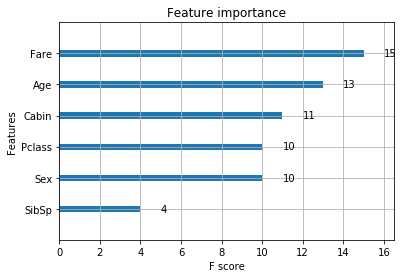

In [9]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
gbm.fit(train, train_sur)
# plot feature importance
plot_importance(gbm)
#pyplot.show() plot_importanceэто f-оценка каждой функции, показывающая важность этой функции для модели. 

In [10]:
gb_mean = xgb_random.score(test, test_sur)
print(gb_mean)

0.8470149253731343


In [11]:
xgb_pred = xgb_random.predict(test)
print(xgb_pred)

[1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1
 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 1]


In [12]:
gbm_params = {
                         'learning_rate': (0.01,0.1), 
                         'n_estimators': (100,500), 
                         'reg_alpha': (1.1, 2), 
                         'colsample_bytree': (0.9, 1), 
                         'subsample': (0.9, 1)}

gbm = lgb.LGBMClassifier()
xgb_random = GridSearchCV(gbm, param_grid=gbm_params, cv = 3, verbose=10)
#cb_model = GridSearchCV(cb, param_grid=params, cv = 3, verbose=10)
xgb_random.fit(train, train_sur)
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)
c2 = xgb_random.refit_time_
print(c2)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=0.9 
[CV]  colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=0.9, score=0.804, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=0.9 
[CV]  colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=0.9, score=0.763, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=0.9 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=0.9, score=0.783, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=1 
[CV]  colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=1, score=0.804, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=1 
[CV]  colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=1, score=0.763, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=1 
[CV]  colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=1, score=0.783, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=2, subsample=0.9 
[CV]  colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=2, subsample=0.9, score=0.804, total=   0.0s
[CV] colsample_bytree

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s


[CV]  colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=2, subsample=1, score=0.804, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=2, subsample=1 
[CV]  colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=2, subsample=1, score=0.768, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=2, subsample=1 
[CV]  colsample_bytree=0.9, learning_rate=0.01, n_estimators=100, reg_alpha=2, subsample=1, score=0.783, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, n_estimators=500, reg_alpha=1.1, subsample=0.9 
[CV]  colsample_bytree=0.9, learning_rate=0.01, n_estimators=500, reg_alpha=1.1, subsample=0.9, score=0.794, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, n_estimators=500, reg_alpha=1.1, subsample=0.9 
[CV]  colsample_bytree=0.9, learning_rate=0.01, n_estimators=500, reg_alpha=1.1, subsample=0.9, score=0.802, total=   0.1s
[CV] colsample_bytree=0.9

[CV]  colsample_bytree=1, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=0.9, score=0.773, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=1, score=0.809, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=1, score=0.768, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.01, n_estimators=100, reg_alpha=1.1, subsample=1, score=0.773, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.01, n_estimators=100, reg_alpha=2, subsample=0.9 
[CV]  colsample_bytree=1, learning_rate=0.01, n_estimators=100, reg_alpha=2, subsample=0.9, score=0.809, total=   0.0s
[CV] colsample_bytree=1, learning_rate=

[CV]  colsample_bytree=1, learning_rate=0.1, n_estimators=500, reg_alpha=2, subsample=1, score=0.794, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.1, n_estimators=500, reg_alpha=2, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.1, n_estimators=500, reg_alpha=2, subsample=1, score=0.787, total=   0.0s
[CV] colsample_bytree=1, learning_rate=0.1, n_estimators=500, reg_alpha=2, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.1, n_estimators=500, reg_alpha=2, subsample=1, score=0.773, total=   0.1s
Best parameters found:  {'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 500, 'reg_alpha': 1.1, 'subsample': 0.9}
Best accuracy found:  0.8041733547351525
0.13362503051757812


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    5.7s finished


In [13]:
lgb_mean = xgb_random.score(test, test_sur)
print(lgb_mean)

0.8246268656716418


In [14]:
xgb_pred = xgb_random.predict(test)
print(xgb_pred)

[1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1
 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0
 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0
 1 0 0 1 1 0 0 0 1]


In [15]:
import catboost as cb
cb = cb.CatBoostClassifier()
params = {'depth': [4, 7]}
#params = {'depth': [4, 7],
#          'learning_rate' : [0.005,0.01],
#         'l2_leaf_reg': [1,4,14],
#         'iterations': [100,300]}
cb_model = GridSearchCV(cb, param_grid=params, cv = 3, verbose=10)
cb_model.fit(train, train_sur)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] depth=4 .........................................................
Learning rate set to 0.013054
0:	learn: 0.6860934	total: 64.2ms	remaining: 1m 4s
1:	learn: 0.6792386	total: 69.1ms	remaining: 34.5s
2:	learn: 0.6730561	total: 73.4ms	remaining: 24.4s
3:	learn: 0.6683320	total: 76.3ms	remaining: 19s
4:	learn: 0.6614116	total: 80.5ms	remaining: 16s
5:	learn: 0.6541306	total: 84.6ms	remaining: 14s
6:	learn: 0.6457965	total: 90.3ms	remaining: 12.8s
7:	learn: 0.6387395	total: 94.5ms	remaining: 11.7s
8:	learn: 0.6313636	total: 98.8ms	remaining: 10.9s
9:	learn: 0.6250869	total: 103ms	remaining: 10.2s
10:	learn: 0.6174250	total: 107ms	remaining: 9.63s
11:	learn: 0.6110898	total: 112ms	remaining: 9.19s
12:	learn: 0.6058381	total: 116ms	remaining: 8.83s
13:	learn: 0.5987654	total: 122ms	remaining: 8.61s
14:	learn: 0.5932214	total: 126ms	remaining: 8.3s
15:	learn: 0.5888193	total: 131ms	remaining: 8.04s
16:	learn: 0.5836872	total: 135m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


20:	learn: 0.5638325	total: 155ms	remaining: 7.24s
21:	learn: 0.5599639	total: 161ms	remaining: 7.17s
22:	learn: 0.5555636	total: 166ms	remaining: 7.06s
23:	learn: 0.5514381	total: 172ms	remaining: 7.01s
24:	learn: 0.5471096	total: 177ms	remaining: 6.9s
25:	learn: 0.5428966	total: 183ms	remaining: 6.84s
26:	learn: 0.5397769	total: 187ms	remaining: 6.75s
27:	learn: 0.5346473	total: 194ms	remaining: 6.74s
28:	learn: 0.5303551	total: 200ms	remaining: 6.71s
29:	learn: 0.5261498	total: 206ms	remaining: 6.65s
30:	learn: 0.5226784	total: 212ms	remaining: 6.62s
31:	learn: 0.5181606	total: 216ms	remaining: 6.53s
32:	learn: 0.5157726	total: 219ms	remaining: 6.41s
33:	learn: 0.5116241	total: 224ms	remaining: 6.36s
34:	learn: 0.5071906	total: 228ms	remaining: 6.29s
35:	learn: 0.5043550	total: 232ms	remaining: 6.22s
36:	learn: 0.5010930	total: 238ms	remaining: 6.18s
37:	learn: 0.4985559	total: 241ms	remaining: 6.11s
38:	learn: 0.4952906	total: 246ms	remaining: 6.06s
39:	learn: 0.4927527	total: 250m

190:	learn: 0.3668425	total: 944ms	remaining: 4s
191:	learn: 0.3664477	total: 950ms	remaining: 4s
192:	learn: 0.3662552	total: 954ms	remaining: 3.99s
193:	learn: 0.3660012	total: 958ms	remaining: 3.98s
194:	learn: 0.3654367	total: 962ms	remaining: 3.97s
195:	learn: 0.3651376	total: 966ms	remaining: 3.96s
196:	learn: 0.3647141	total: 969ms	remaining: 3.95s
197:	learn: 0.3643134	total: 973ms	remaining: 3.94s
198:	learn: 0.3639274	total: 977ms	remaining: 3.93s
199:	learn: 0.3637599	total: 981ms	remaining: 3.92s
200:	learn: 0.3634812	total: 985ms	remaining: 3.92s
201:	learn: 0.3631204	total: 989ms	remaining: 3.91s
202:	learn: 0.3629927	total: 993ms	remaining: 3.9s
203:	learn: 0.3627574	total: 997ms	remaining: 3.89s
204:	learn: 0.3625762	total: 1s	remaining: 3.88s
205:	learn: 0.3624267	total: 1s	remaining: 3.87s
206:	learn: 0.3622318	total: 1.01s	remaining: 3.86s
207:	learn: 0.3616863	total: 1.01s	remaining: 3.85s
208:	learn: 0.3615939	total: 1.01s	remaining: 3.84s
209:	learn: 0.3613288	tot

359:	learn: 0.3379658	total: 1.67s	remaining: 2.98s
360:	learn: 0.3378786	total: 1.68s	remaining: 2.97s
361:	learn: 0.3378149	total: 1.68s	remaining: 2.96s
362:	learn: 0.3373183	total: 1.69s	remaining: 2.96s
363:	learn: 0.3371066	total: 1.69s	remaining: 2.96s
364:	learn: 0.3367688	total: 1.7s	remaining: 2.95s
365:	learn: 0.3366499	total: 1.7s	remaining: 2.95s
366:	learn: 0.3364559	total: 1.7s	remaining: 2.94s
367:	learn: 0.3363122	total: 1.71s	remaining: 2.93s
368:	learn: 0.3362598	total: 1.71s	remaining: 2.93s
369:	learn: 0.3361753	total: 1.72s	remaining: 2.92s
370:	learn: 0.3356938	total: 1.72s	remaining: 2.92s
371:	learn: 0.3353483	total: 1.72s	remaining: 2.91s
372:	learn: 0.3352899	total: 1.73s	remaining: 2.91s
373:	learn: 0.3352255	total: 1.74s	remaining: 2.9s
374:	learn: 0.3351001	total: 1.74s	remaining: 2.9s
375:	learn: 0.3350336	total: 1.74s	remaining: 2.89s
376:	learn: 0.3349575	total: 1.75s	remaining: 2.89s
377:	learn: 0.3349286	total: 1.75s	remaining: 2.88s
378:	learn: 0.334

542:	learn: 0.3114491	total: 2.46s	remaining: 2.07s
543:	learn: 0.3112327	total: 2.47s	remaining: 2.07s
544:	learn: 0.3111102	total: 2.47s	remaining: 2.06s
545:	learn: 0.3110583	total: 2.48s	remaining: 2.06s
546:	learn: 0.3109155	total: 2.48s	remaining: 2.06s
547:	learn: 0.3107322	total: 2.49s	remaining: 2.05s
548:	learn: 0.3106276	total: 2.49s	remaining: 2.05s
549:	learn: 0.3105053	total: 2.5s	remaining: 2.04s
550:	learn: 0.3104932	total: 2.5s	remaining: 2.04s
551:	learn: 0.3104420	total: 2.5s	remaining: 2.03s
552:	learn: 0.3103005	total: 2.51s	remaining: 2.03s
553:	learn: 0.3102245	total: 2.51s	remaining: 2.02s
554:	learn: 0.3100594	total: 2.52s	remaining: 2.02s
555:	learn: 0.3099282	total: 2.52s	remaining: 2.02s
556:	learn: 0.3097948	total: 2.53s	remaining: 2.01s
557:	learn: 0.3096485	total: 2.53s	remaining: 2s
558:	learn: 0.3096027	total: 2.54s	remaining: 2s
559:	learn: 0.3095479	total: 2.54s	remaining: 2s
560:	learn: 0.3093851	total: 2.54s	remaining: 1.99s
561:	learn: 0.3091415	to

729:	learn: 0.2789291	total: 3.25s	remaining: 1.2s
730:	learn: 0.2788666	total: 3.26s	remaining: 1.2s
731:	learn: 0.2788105	total: 3.26s	remaining: 1.19s
732:	learn: 0.2785622	total: 3.27s	remaining: 1.19s
733:	learn: 0.2783280	total: 3.27s	remaining: 1.19s
734:	learn: 0.2782174	total: 3.28s	remaining: 1.18s
735:	learn: 0.2777822	total: 3.28s	remaining: 1.18s
736:	learn: 0.2775019	total: 3.29s	remaining: 1.17s
737:	learn: 0.2772689	total: 3.29s	remaining: 1.17s
738:	learn: 0.2769657	total: 3.29s	remaining: 1.16s
739:	learn: 0.2768443	total: 3.3s	remaining: 1.16s
740:	learn: 0.2767102	total: 3.3s	remaining: 1.15s
741:	learn: 0.2766057	total: 3.31s	remaining: 1.15s
742:	learn: 0.2764962	total: 3.31s	remaining: 1.14s
743:	learn: 0.2762395	total: 3.31s	remaining: 1.14s
744:	learn: 0.2761476	total: 3.32s	remaining: 1.14s
745:	learn: 0.2759404	total: 3.32s	remaining: 1.13s
746:	learn: 0.2756481	total: 3.33s	remaining: 1.13s
747:	learn: 0.2754305	total: 3.33s	remaining: 1.12s
748:	learn: 0.27

890:	learn: 0.2528122	total: 4.11s	remaining: 503ms
891:	learn: 0.2526049	total: 4.12s	remaining: 498ms
892:	learn: 0.2524113	total: 4.12s	remaining: 494ms
893:	learn: 0.2523001	total: 4.12s	remaining: 489ms
894:	learn: 0.2521896	total: 4.13s	remaining: 484ms
895:	learn: 0.2521359	total: 4.13s	remaining: 480ms
896:	learn: 0.2519209	total: 4.14s	remaining: 475ms
897:	learn: 0.2518777	total: 4.14s	remaining: 470ms
898:	learn: 0.2517747	total: 4.14s	remaining: 466ms
899:	learn: 0.2515734	total: 4.15s	remaining: 461ms
900:	learn: 0.2515371	total: 4.15s	remaining: 456ms
901:	learn: 0.2514398	total: 4.16s	remaining: 452ms
902:	learn: 0.2512303	total: 4.16s	remaining: 447ms
903:	learn: 0.2510889	total: 4.17s	remaining: 442ms
904:	learn: 0.2508446	total: 4.17s	remaining: 438ms
905:	learn: 0.2507147	total: 4.17s	remaining: 433ms
906:	learn: 0.2505917	total: 4.18s	remaining: 428ms
907:	learn: 0.2504682	total: 4.18s	remaining: 424ms
908:	learn: 0.2503042	total: 4.19s	remaining: 419ms
909:	learn: 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


21:	learn: 0.5666007	total: 107ms	remaining: 4.73s
22:	learn: 0.5623391	total: 112ms	remaining: 4.75s
23:	learn: 0.5579030	total: 116ms	remaining: 4.71s
24:	learn: 0.5554092	total: 120ms	remaining: 4.66s
25:	learn: 0.5522512	total: 123ms	remaining: 4.62s
26:	learn: 0.5483872	total: 127ms	remaining: 4.59s
27:	learn: 0.5446308	total: 131ms	remaining: 4.56s
28:	learn: 0.5401729	total: 135ms	remaining: 4.53s
29:	learn: 0.5376040	total: 139ms	remaining: 4.5s
30:	learn: 0.5348058	total: 143ms	remaining: 4.48s
31:	learn: 0.5324122	total: 147ms	remaining: 4.46s
32:	learn: 0.5296907	total: 151ms	remaining: 4.42s
33:	learn: 0.5271714	total: 155ms	remaining: 4.39s
34:	learn: 0.5240699	total: 159ms	remaining: 4.38s
35:	learn: 0.5218264	total: 163ms	remaining: 4.36s
36:	learn: 0.5193539	total: 167ms	remaining: 4.34s
37:	learn: 0.5172206	total: 171ms	remaining: 4.32s
38:	learn: 0.5140319	total: 175ms	remaining: 4.31s
39:	learn: 0.5110245	total: 179ms	remaining: 4.29s
40:	learn: 0.5086051	total: 182m

195:	learn: 0.3893126	total: 827ms	remaining: 3.39s
196:	learn: 0.3891012	total: 832ms	remaining: 3.39s
197:	learn: 0.3888405	total: 836ms	remaining: 3.39s
198:	learn: 0.3884868	total: 840ms	remaining: 3.38s
199:	learn: 0.3882026	total: 846ms	remaining: 3.38s
200:	learn: 0.3879367	total: 851ms	remaining: 3.38s
201:	learn: 0.3878221	total: 855ms	remaining: 3.38s
202:	learn: 0.3875842	total: 859ms	remaining: 3.37s
203:	learn: 0.3872687	total: 863ms	remaining: 3.37s
204:	learn: 0.3868408	total: 867ms	remaining: 3.36s
205:	learn: 0.3866642	total: 871ms	remaining: 3.36s
206:	learn: 0.3862612	total: 876ms	remaining: 3.35s
207:	learn: 0.3860378	total: 881ms	remaining: 3.35s
208:	learn: 0.3858161	total: 885ms	remaining: 3.35s
209:	learn: 0.3856323	total: 889ms	remaining: 3.34s
210:	learn: 0.3853867	total: 894ms	remaining: 3.34s
211:	learn: 0.3849712	total: 899ms	remaining: 3.34s
212:	learn: 0.3848164	total: 903ms	remaining: 3.33s
213:	learn: 0.3846099	total: 906ms	remaining: 3.33s
214:	learn: 

368:	learn: 0.3563296	total: 1.7s	remaining: 2.9s
369:	learn: 0.3560734	total: 1.7s	remaining: 2.9s
370:	learn: 0.3560127	total: 1.71s	remaining: 2.89s
371:	learn: 0.3558710	total: 1.71s	remaining: 2.88s
372:	learn: 0.3556417	total: 1.71s	remaining: 2.88s
373:	learn: 0.3554455	total: 1.72s	remaining: 2.88s
374:	learn: 0.3553147	total: 1.72s	remaining: 2.87s
375:	learn: 0.3552518	total: 1.73s	remaining: 2.87s
376:	learn: 0.3550348	total: 1.73s	remaining: 2.86s
377:	learn: 0.3547479	total: 1.74s	remaining: 2.85s
378:	learn: 0.3546080	total: 1.74s	remaining: 2.85s
379:	learn: 0.3545156	total: 1.74s	remaining: 2.84s
380:	learn: 0.3543258	total: 1.75s	remaining: 2.84s
381:	learn: 0.3542001	total: 1.75s	remaining: 2.83s
382:	learn: 0.3540730	total: 1.76s	remaining: 2.83s
383:	learn: 0.3539063	total: 1.76s	remaining: 2.82s
384:	learn: 0.3537824	total: 1.76s	remaining: 2.82s
385:	learn: 0.3535885	total: 1.77s	remaining: 2.81s
386:	learn: 0.3534645	total: 1.77s	remaining: 2.81s
387:	learn: 0.35

537:	learn: 0.3293477	total: 2.49s	remaining: 2.14s
538:	learn: 0.3292073	total: 2.49s	remaining: 2.13s
539:	learn: 0.3289448	total: 2.5s	remaining: 2.13s
540:	learn: 0.3288609	total: 2.5s	remaining: 2.12s
541:	learn: 0.3286486	total: 2.51s	remaining: 2.12s
542:	learn: 0.3283792	total: 2.51s	remaining: 2.11s
543:	learn: 0.3283085	total: 2.52s	remaining: 2.11s
544:	learn: 0.3281126	total: 2.52s	remaining: 2.1s
545:	learn: 0.3279731	total: 2.52s	remaining: 2.1s
546:	learn: 0.3277772	total: 2.53s	remaining: 2.09s
547:	learn: 0.3276712	total: 2.53s	remaining: 2.09s
548:	learn: 0.3274230	total: 2.54s	remaining: 2.08s
549:	learn: 0.3269038	total: 2.54s	remaining: 2.08s
550:	learn: 0.3267787	total: 2.54s	remaining: 2.07s
551:	learn: 0.3266943	total: 2.55s	remaining: 2.07s
552:	learn: 0.3263772	total: 2.55s	remaining: 2.06s
553:	learn: 0.3260684	total: 2.56s	remaining: 2.06s
554:	learn: 0.3259938	total: 2.56s	remaining: 2.05s
555:	learn: 0.3257682	total: 2.57s	remaining: 2.05s
556:	learn: 0.32

701:	learn: 0.3015497	total: 3.19s	remaining: 1.35s
702:	learn: 0.3012648	total: 3.2s	remaining: 1.35s
703:	learn: 0.3012220	total: 3.2s	remaining: 1.34s
704:	learn: 0.3008217	total: 3.2s	remaining: 1.34s
705:	learn: 0.3005643	total: 3.21s	remaining: 1.34s
706:	learn: 0.3003455	total: 3.21s	remaining: 1.33s
707:	learn: 0.3002788	total: 3.22s	remaining: 1.33s
708:	learn: 0.3002436	total: 3.22s	remaining: 1.32s
709:	learn: 0.3001640	total: 3.22s	remaining: 1.32s
710:	learn: 0.2998848	total: 3.23s	remaining: 1.31s
711:	learn: 0.2994941	total: 3.23s	remaining: 1.31s
712:	learn: 0.2991833	total: 3.23s	remaining: 1.3s
713:	learn: 0.2988041	total: 3.24s	remaining: 1.3s
714:	learn: 0.2986446	total: 3.24s	remaining: 1.29s
715:	learn: 0.2982743	total: 3.25s	remaining: 1.29s
716:	learn: 0.2981518	total: 3.25s	remaining: 1.28s
717:	learn: 0.2978531	total: 3.25s	remaining: 1.28s
718:	learn: 0.2977796	total: 3.26s	remaining: 1.27s
719:	learn: 0.2975587	total: 3.26s	remaining: 1.27s
720:	learn: 0.297

864:	learn: 0.2766213	total: 3.85s	remaining: 602ms
865:	learn: 0.2764716	total: 3.86s	remaining: 597ms
866:	learn: 0.2762513	total: 3.87s	remaining: 593ms
867:	learn: 0.2761482	total: 3.87s	remaining: 588ms
868:	learn: 0.2760079	total: 3.87s	remaining: 584ms
869:	learn: 0.2758361	total: 3.88s	remaining: 579ms
870:	learn: 0.2758073	total: 3.88s	remaining: 575ms
871:	learn: 0.2757457	total: 3.88s	remaining: 570ms
872:	learn: 0.2756032	total: 3.89s	remaining: 566ms
873:	learn: 0.2753685	total: 3.89s	remaining: 561ms
874:	learn: 0.2752518	total: 3.9s	remaining: 557ms
875:	learn: 0.2751659	total: 3.9s	remaining: 552ms
876:	learn: 0.2751030	total: 3.9s	remaining: 548ms
877:	learn: 0.2748860	total: 3.91s	remaining: 543ms
878:	learn: 0.2747757	total: 3.91s	remaining: 539ms
879:	learn: 0.2745567	total: 3.92s	remaining: 534ms
880:	learn: 0.2743339	total: 3.92s	remaining: 530ms
881:	learn: 0.2742443	total: 3.92s	remaining: 525ms
882:	learn: 0.2741234	total: 3.93s	remaining: 521ms
883:	learn: 0.2

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


32:	learn: 0.5226903	total: 127ms	remaining: 3.71s
33:	learn: 0.5189929	total: 134ms	remaining: 3.81s
34:	learn: 0.5150612	total: 138ms	remaining: 3.8s
35:	learn: 0.5118375	total: 142ms	remaining: 3.79s
36:	learn: 0.5084151	total: 146ms	remaining: 3.79s
37:	learn: 0.5050611	total: 150ms	remaining: 3.79s
38:	learn: 0.5016761	total: 153ms	remaining: 3.78s
39:	learn: 0.4985290	total: 157ms	remaining: 3.77s
40:	learn: 0.4963454	total: 162ms	remaining: 3.78s
41:	learn: 0.4931021	total: 166ms	remaining: 3.78s
42:	learn: 0.4897236	total: 170ms	remaining: 3.77s
43:	learn: 0.4869025	total: 173ms	remaining: 3.77s
44:	learn: 0.4852262	total: 177ms	remaining: 3.76s
45:	learn: 0.4825501	total: 181ms	remaining: 3.76s
46:	learn: 0.4804180	total: 185ms	remaining: 3.75s
47:	learn: 0.4778549	total: 189ms	remaining: 3.74s
48:	learn: 0.4751196	total: 195ms	remaining: 3.79s
49:	learn: 0.4739555	total: 199ms	remaining: 3.78s
50:	learn: 0.4720730	total: 203ms	remaining: 3.77s
51:	learn: 0.4696429	total: 207m

195:	learn: 0.3554382	total: 803ms	remaining: 3.29s
196:	learn: 0.3553074	total: 808ms	remaining: 3.29s
197:	learn: 0.3551292	total: 812ms	remaining: 3.29s
198:	learn: 0.3548403	total: 816ms	remaining: 3.28s
199:	learn: 0.3544313	total: 820ms	remaining: 3.28s
200:	learn: 0.3541167	total: 824ms	remaining: 3.28s
201:	learn: 0.3537334	total: 828ms	remaining: 3.27s
202:	learn: 0.3534964	total: 832ms	remaining: 3.27s
203:	learn: 0.3531591	total: 836ms	remaining: 3.26s
204:	learn: 0.3529328	total: 840ms	remaining: 3.26s
205:	learn: 0.3527918	total: 843ms	remaining: 3.25s
206:	learn: 0.3525055	total: 847ms	remaining: 3.25s
207:	learn: 0.3521466	total: 851ms	remaining: 3.24s
208:	learn: 0.3519601	total: 856ms	remaining: 3.24s
209:	learn: 0.3516431	total: 860ms	remaining: 3.23s
210:	learn: 0.3515137	total: 863ms	remaining: 3.23s
211:	learn: 0.3514035	total: 868ms	remaining: 3.23s
212:	learn: 0.3509371	total: 871ms	remaining: 3.22s
213:	learn: 0.3507481	total: 875ms	remaining: 3.21s
214:	learn: 

369:	learn: 0.3149987	total: 1.58s	remaining: 2.69s
370:	learn: 0.3147687	total: 1.59s	remaining: 2.69s
371:	learn: 0.3146998	total: 1.59s	remaining: 2.69s
372:	learn: 0.3144957	total: 1.6s	remaining: 2.68s
373:	learn: 0.3142656	total: 1.6s	remaining: 2.68s
374:	learn: 0.3141054	total: 1.6s	remaining: 2.67s
375:	learn: 0.3138800	total: 1.61s	remaining: 2.67s
376:	learn: 0.3136822	total: 1.61s	remaining: 2.66s
377:	learn: 0.3134615	total: 1.62s	remaining: 2.66s
378:	learn: 0.3131674	total: 1.62s	remaining: 2.65s
379:	learn: 0.3129363	total: 1.62s	remaining: 2.65s
380:	learn: 0.3127955	total: 1.63s	remaining: 2.65s
381:	learn: 0.3126186	total: 1.63s	remaining: 2.64s
382:	learn: 0.3123155	total: 1.64s	remaining: 2.64s
383:	learn: 0.3122464	total: 1.64s	remaining: 2.63s
384:	learn: 0.3121334	total: 1.65s	remaining: 2.63s
385:	learn: 0.3118799	total: 1.65s	remaining: 2.62s
386:	learn: 0.3115789	total: 1.65s	remaining: 2.62s
387:	learn: 0.3113850	total: 1.66s	remaining: 2.61s
388:	learn: 0.3

531:	learn: 0.2848245	total: 2.27s	remaining: 2s
532:	learn: 0.2845555	total: 2.28s	remaining: 2s
533:	learn: 0.2844990	total: 2.29s	remaining: 1.99s
534:	learn: 0.2843649	total: 2.29s	remaining: 1.99s
535:	learn: 0.2842625	total: 2.29s	remaining: 1.99s
536:	learn: 0.2841131	total: 2.3s	remaining: 1.98s
537:	learn: 0.2836359	total: 2.3s	remaining: 1.98s
538:	learn: 0.2831961	total: 2.3s	remaining: 1.97s
539:	learn: 0.2830910	total: 2.31s	remaining: 1.97s
540:	learn: 0.2829976	total: 2.31s	remaining: 1.96s
541:	learn: 0.2827953	total: 2.32s	remaining: 1.96s
542:	learn: 0.2825081	total: 2.32s	remaining: 1.95s
543:	learn: 0.2822212	total: 2.33s	remaining: 1.95s
544:	learn: 0.2819811	total: 2.33s	remaining: 1.95s
545:	learn: 0.2818211	total: 2.33s	remaining: 1.94s
546:	learn: 0.2816277	total: 2.34s	remaining: 1.94s
547:	learn: 0.2814456	total: 2.34s	remaining: 1.93s
548:	learn: 0.2812728	total: 2.35s	remaining: 1.93s
549:	learn: 0.2810072	total: 2.35s	remaining: 1.92s
550:	learn: 0.2809054

696:	learn: 0.2535871	total: 2.96s	remaining: 1.29s
697:	learn: 0.2534127	total: 2.97s	remaining: 1.28s
698:	learn: 0.2532182	total: 2.97s	remaining: 1.28s
699:	learn: 0.2529155	total: 2.98s	remaining: 1.27s
700:	learn: 0.2525609	total: 2.98s	remaining: 1.27s
701:	learn: 0.2522458	total: 2.98s	remaining: 1.27s
702:	learn: 0.2520441	total: 2.99s	remaining: 1.26s
703:	learn: 0.2518331	total: 2.99s	remaining: 1.26s
704:	learn: 0.2516510	total: 3s	remaining: 1.25s
705:	learn: 0.2514679	total: 3s	remaining: 1.25s
706:	learn: 0.2514147	total: 3s	remaining: 1.25s
707:	learn: 0.2512910	total: 3.01s	remaining: 1.24s
708:	learn: 0.2510059	total: 3.01s	remaining: 1.24s
709:	learn: 0.2509149	total: 3.02s	remaining: 1.23s
710:	learn: 0.2508674	total: 3.02s	remaining: 1.23s
711:	learn: 0.2507661	total: 3.02s	remaining: 1.22s
712:	learn: 0.2507261	total: 3.03s	remaining: 1.22s
713:	learn: 0.2504756	total: 3.03s	remaining: 1.21s
714:	learn: 0.2503995	total: 3.04s	remaining: 1.21s
715:	learn: 0.2502955

863:	learn: 0.2288540	total: 3.66s	remaining: 576ms
864:	learn: 0.2287519	total: 3.67s	remaining: 572ms
865:	learn: 0.2285636	total: 3.67s	remaining: 568ms
866:	learn: 0.2284990	total: 3.67s	remaining: 563ms
867:	learn: 0.2283744	total: 3.68s	remaining: 559ms
868:	learn: 0.2282281	total: 3.68s	remaining: 555ms
869:	learn: 0.2281097	total: 3.69s	remaining: 551ms
870:	learn: 0.2279504	total: 3.69s	remaining: 547ms
871:	learn: 0.2278356	total: 3.69s	remaining: 542ms
872:	learn: 0.2276125	total: 3.7s	remaining: 538ms
873:	learn: 0.2274722	total: 3.7s	remaining: 534ms
874:	learn: 0.2274256	total: 3.71s	remaining: 530ms
875:	learn: 0.2272883	total: 3.71s	remaining: 525ms
876:	learn: 0.2270944	total: 3.71s	remaining: 521ms
877:	learn: 0.2270325	total: 3.72s	remaining: 517ms
878:	learn: 0.2269356	total: 3.72s	remaining: 512ms
879:	learn: 0.2268250	total: 3.73s	remaining: 508ms
880:	learn: 0.2267616	total: 3.73s	remaining: 504ms
881:	learn: 0.2266143	total: 3.73s	remaining: 500ms
882:	learn: 0.

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.8s remaining:    0.0s


19:	learn: 0.5581040	total: 108ms	remaining: 5.31s
20:	learn: 0.5517909	total: 115ms	remaining: 5.35s
21:	learn: 0.5477631	total: 119ms	remaining: 5.29s
22:	learn: 0.5422249	total: 125ms	remaining: 5.32s
23:	learn: 0.5377312	total: 130ms	remaining: 5.3s
24:	learn: 0.5336518	total: 134ms	remaining: 5.23s
25:	learn: 0.5283814	total: 138ms	remaining: 5.17s
26:	learn: 0.5241497	total: 143ms	remaining: 5.15s
27:	learn: 0.5204737	total: 149ms	remaining: 5.16s
28:	learn: 0.5157989	total: 155ms	remaining: 5.18s
29:	learn: 0.5138464	total: 158ms	remaining: 5.11s
30:	learn: 0.5097375	total: 164ms	remaining: 5.12s
31:	learn: 0.5062379	total: 170ms	remaining: 5.13s
32:	learn: 0.5027734	total: 174ms	remaining: 5.1s
33:	learn: 0.5010612	total: 177ms	remaining: 5.04s
34:	learn: 0.4969572	total: 183ms	remaining: 5.06s
35:	learn: 0.4943284	total: 187ms	remaining: 5.02s
36:	learn: 0.4917928	total: 192ms	remaining: 4.99s
37:	learn: 0.4887752	total: 199ms	remaining: 5.03s
38:	learn: 0.4865397	total: 203ms

183:	learn: 0.3407672	total: 989ms	remaining: 4.39s
184:	learn: 0.3398347	total: 998ms	remaining: 4.39s
185:	learn: 0.3396842	total: 1s	remaining: 4.38s
186:	learn: 0.3396528	total: 1s	remaining: 4.36s
187:	learn: 0.3390770	total: 1.01s	remaining: 4.36s
188:	learn: 0.3387802	total: 1.01s	remaining: 4.35s
189:	learn: 0.3384434	total: 1.02s	remaining: 4.35s
190:	learn: 0.3380339	total: 1.03s	remaining: 4.35s
191:	learn: 0.3374435	total: 1.03s	remaining: 4.34s
192:	learn: 0.3371913	total: 1.04s	remaining: 4.33s
193:	learn: 0.3369025	total: 1.04s	remaining: 4.33s
194:	learn: 0.3367441	total: 1.05s	remaining: 4.32s
195:	learn: 0.3366248	total: 1.05s	remaining: 4.32s
196:	learn: 0.3361861	total: 1.06s	remaining: 4.32s
197:	learn: 0.3359058	total: 1.06s	remaining: 4.31s
198:	learn: 0.3354501	total: 1.07s	remaining: 4.31s
199:	learn: 0.3353696	total: 1.07s	remaining: 4.3s
200:	learn: 0.3348279	total: 1.08s	remaining: 4.3s
201:	learn: 0.3345422	total: 1.09s	remaining: 4.29s
202:	learn: 0.334153

345:	learn: 0.2960256	total: 1.9s	remaining: 3.58s
346:	learn: 0.2958401	total: 1.9s	remaining: 3.58s
347:	learn: 0.2951693	total: 1.91s	remaining: 3.57s
348:	learn: 0.2950057	total: 1.91s	remaining: 3.57s
349:	learn: 0.2949834	total: 1.92s	remaining: 3.56s
350:	learn: 0.2948802	total: 1.92s	remaining: 3.55s
351:	learn: 0.2945153	total: 1.93s	remaining: 3.55s
352:	learn: 0.2942009	total: 1.93s	remaining: 3.55s
353:	learn: 0.2941081	total: 1.94s	remaining: 3.54s
354:	learn: 0.2936600	total: 1.95s	remaining: 3.54s
355:	learn: 0.2933467	total: 1.95s	remaining: 3.53s
356:	learn: 0.2931353	total: 1.96s	remaining: 3.53s
357:	learn: 0.2928256	total: 1.96s	remaining: 3.52s
358:	learn: 0.2927110	total: 1.97s	remaining: 3.51s
359:	learn: 0.2925126	total: 1.98s	remaining: 3.51s
360:	learn: 0.2923021	total: 1.98s	remaining: 3.51s
361:	learn: 0.2917304	total: 1.99s	remaining: 3.5s
362:	learn: 0.2915349	total: 2s	remaining: 3.5s
363:	learn: 0.2910786	total: 2s	remaining: 3.5s
364:	learn: 0.2907059	t

507:	learn: 0.2556611	total: 2.89s	remaining: 2.8s
508:	learn: 0.2553356	total: 2.9s	remaining: 2.79s
509:	learn: 0.2551493	total: 2.9s	remaining: 2.79s
510:	learn: 0.2547715	total: 2.91s	remaining: 2.78s
511:	learn: 0.2546808	total: 2.91s	remaining: 2.78s
512:	learn: 0.2541907	total: 2.92s	remaining: 2.77s
513:	learn: 0.2535920	total: 2.92s	remaining: 2.77s
514:	learn: 0.2534204	total: 2.93s	remaining: 2.76s
515:	learn: 0.2529961	total: 2.94s	remaining: 2.75s
516:	learn: 0.2528185	total: 2.94s	remaining: 2.75s
517:	learn: 0.2524871	total: 2.95s	remaining: 2.74s
518:	learn: 0.2524267	total: 2.95s	remaining: 2.74s
519:	learn: 0.2522286	total: 2.96s	remaining: 2.73s
520:	learn: 0.2521057	total: 2.96s	remaining: 2.72s
521:	learn: 0.2520198	total: 2.97s	remaining: 2.72s
522:	learn: 0.2519656	total: 2.98s	remaining: 2.71s
523:	learn: 0.2517165	total: 2.98s	remaining: 2.71s
524:	learn: 0.2513126	total: 2.98s	remaining: 2.7s
525:	learn: 0.2509843	total: 2.99s	remaining: 2.7s
526:	learn: 0.250

672:	learn: 0.2149072	total: 3.87s	remaining: 1.88s
673:	learn: 0.2147544	total: 3.88s	remaining: 1.88s
674:	learn: 0.2147156	total: 3.88s	remaining: 1.87s
675:	learn: 0.2144985	total: 3.89s	remaining: 1.86s
676:	learn: 0.2141448	total: 3.9s	remaining: 1.86s
677:	learn: 0.2137733	total: 3.9s	remaining: 1.85s
678:	learn: 0.2135989	total: 3.91s	remaining: 1.85s
679:	learn: 0.2135123	total: 3.91s	remaining: 1.84s
680:	learn: 0.2131144	total: 3.92s	remaining: 1.84s
681:	learn: 0.2128343	total: 3.93s	remaining: 1.83s
682:	learn: 0.2126331	total: 3.93s	remaining: 1.82s
683:	learn: 0.2121689	total: 3.94s	remaining: 1.82s
684:	learn: 0.2120620	total: 3.94s	remaining: 1.81s
685:	learn: 0.2116857	total: 3.95s	remaining: 1.81s
686:	learn: 0.2115128	total: 3.96s	remaining: 1.8s
687:	learn: 0.2112574	total: 3.96s	remaining: 1.8s
688:	learn: 0.2110404	total: 3.97s	remaining: 1.79s
689:	learn: 0.2107304	total: 3.97s	remaining: 1.78s
690:	learn: 0.2103872	total: 3.98s	remaining: 1.78s
691:	learn: 0.20

843:	learn: 0.1828911	total: 4.87s	remaining: 899ms
844:	learn: 0.1827595	total: 4.87s	remaining: 894ms
845:	learn: 0.1826956	total: 4.88s	remaining: 888ms
846:	learn: 0.1823706	total: 4.88s	remaining: 882ms
847:	learn: 0.1822324	total: 4.89s	remaining: 877ms
848:	learn: 0.1819387	total: 4.9s	remaining: 871ms
849:	learn: 0.1818065	total: 4.9s	remaining: 865ms
850:	learn: 0.1816413	total: 4.91s	remaining: 860ms
851:	learn: 0.1814585	total: 4.92s	remaining: 854ms
852:	learn: 0.1813843	total: 4.92s	remaining: 848ms
853:	learn: 0.1812288	total: 4.93s	remaining: 842ms
854:	learn: 0.1812043	total: 4.93s	remaining: 837ms
855:	learn: 0.1811120	total: 4.94s	remaining: 831ms
856:	learn: 0.1809117	total: 4.95s	remaining: 825ms
857:	learn: 0.1808610	total: 4.95s	remaining: 820ms
858:	learn: 0.1807626	total: 4.96s	remaining: 814ms
859:	learn: 0.1807302	total: 4.96s	remaining: 808ms
860:	learn: 0.1806277	total: 4.97s	remaining: 803ms
861:	learn: 0.1806073	total: 4.97s	remaining: 797ms
862:	learn: 0.

6:	learn: 0.6431948	total: 35ms	remaining: 4.96s
7:	learn: 0.6366230	total: 39.5ms	remaining: 4.9s
8:	learn: 0.6299770	total: 45.3ms	remaining: 4.99s
9:	learn: 0.6237787	total: 50.1ms	remaining: 4.96s
10:	learn: 0.6174528	total: 53.8ms	remaining: 4.84s
11:	learn: 0.6107823	total: 57.8ms	remaining: 4.75s
12:	learn: 0.6062344	total: 61.7ms	remaining: 4.68s
13:	learn: 0.6004779	total: 68ms	remaining: 4.79s
14:	learn: 0.5977773	total: 70.4ms	remaining: 4.62s
15:	learn: 0.5922808	total: 74.3ms	remaining: 4.57s
16:	learn: 0.5886478	total: 78.2ms	remaining: 4.52s
17:	learn: 0.5861845	total: 80.7ms	remaining: 4.4s
18:	learn: 0.5812895	total: 84.9ms	remaining: 4.38s
19:	learn: 0.5756461	total: 90.6ms	remaining: 4.44s
20:	learn: 0.5702770	total: 95.8ms	remaining: 4.47s
21:	learn: 0.5654365	total: 102ms	remaining: 4.54s
22:	learn: 0.5602110	total: 107ms	remaining: 4.53s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   19.8s remaining:    0.0s


23:	learn: 0.5557096	total: 111ms	remaining: 4.53s
24:	learn: 0.5507402	total: 119ms	remaining: 4.65s
25:	learn: 0.5495347	total: 123ms	remaining: 4.59s
26:	learn: 0.5458759	total: 126ms	remaining: 4.55s
27:	learn: 0.5410067	total: 131ms	remaining: 4.56s
28:	learn: 0.5377219	total: 136ms	remaining: 4.55s
29:	learn: 0.5343863	total: 140ms	remaining: 4.51s
30:	learn: 0.5304931	total: 145ms	remaining: 4.53s
31:	learn: 0.5268821	total: 151ms	remaining: 4.57s
32:	learn: 0.5227267	total: 155ms	remaining: 4.56s
33:	learn: 0.5188648	total: 161ms	remaining: 4.59s
34:	learn: 0.5151645	total: 168ms	remaining: 4.63s
35:	learn: 0.5118040	total: 173ms	remaining: 4.64s
36:	learn: 0.5084008	total: 179ms	remaining: 4.67s
37:	learn: 0.5050259	total: 185ms	remaining: 4.69s
38:	learn: 0.5029959	total: 190ms	remaining: 4.67s
39:	learn: 0.5003796	total: 199ms	remaining: 4.77s
40:	learn: 0.4977658	total: 203ms	remaining: 4.74s
41:	learn: 0.4947904	total: 207ms	remaining: 4.73s
42:	learn: 0.4921799	total: 212

192:	learn: 0.3570412	total: 1.04s	remaining: 4.33s
193:	learn: 0.3568174	total: 1.04s	remaining: 4.33s
194:	learn: 0.3566204	total: 1.05s	remaining: 4.33s
195:	learn: 0.3562353	total: 1.05s	remaining: 4.32s
196:	learn: 0.3558502	total: 1.06s	remaining: 4.32s
197:	learn: 0.3555942	total: 1.06s	remaining: 4.31s
198:	learn: 0.3549638	total: 1.07s	remaining: 4.31s
199:	learn: 0.3545574	total: 1.07s	remaining: 4.3s
200:	learn: 0.3544119	total: 1.08s	remaining: 4.29s
201:	learn: 0.3540731	total: 1.08s	remaining: 4.29s
202:	learn: 0.3536110	total: 1.09s	remaining: 4.28s
203:	learn: 0.3534326	total: 1.09s	remaining: 4.27s
204:	learn: 0.3530247	total: 1.1s	remaining: 4.28s
205:	learn: 0.3527369	total: 1.11s	remaining: 4.28s
206:	learn: 0.3524795	total: 1.11s	remaining: 4.27s
207:	learn: 0.3521090	total: 1.12s	remaining: 4.26s
208:	learn: 0.3517221	total: 1.13s	remaining: 4.26s
209:	learn: 0.3517012	total: 1.13s	remaining: 4.24s
210:	learn: 0.3514204	total: 1.13s	remaining: 4.24s
211:	learn: 0.

362:	learn: 0.3081746	total: 2.02s	remaining: 3.54s
363:	learn: 0.3079886	total: 2.02s	remaining: 3.53s
364:	learn: 0.3078365	total: 2.03s	remaining: 3.53s
365:	learn: 0.3074861	total: 2.04s	remaining: 3.52s
366:	learn: 0.3072160	total: 2.04s	remaining: 3.52s
367:	learn: 0.3068676	total: 2.05s	remaining: 3.52s
368:	learn: 0.3064785	total: 2.05s	remaining: 3.51s
369:	learn: 0.3063974	total: 2.06s	remaining: 3.51s
370:	learn: 0.3062122	total: 2.06s	remaining: 3.5s
371:	learn: 0.3059881	total: 2.07s	remaining: 3.5s
372:	learn: 0.3058290	total: 2.08s	remaining: 3.49s
373:	learn: 0.3057819	total: 2.08s	remaining: 3.48s
374:	learn: 0.3053752	total: 2.09s	remaining: 3.48s
375:	learn: 0.3051909	total: 2.1s	remaining: 3.48s
376:	learn: 0.3049491	total: 2.1s	remaining: 3.47s
377:	learn: 0.3047146	total: 2.11s	remaining: 3.47s
378:	learn: 0.3046004	total: 2.11s	remaining: 3.46s
379:	learn: 0.3043818	total: 2.12s	remaining: 3.46s
380:	learn: 0.3039551	total: 2.12s	remaining: 3.45s
381:	learn: 0.30

532:	learn: 0.2668995	total: 2.99s	remaining: 2.62s
533:	learn: 0.2666471	total: 3s	remaining: 2.62s
534:	learn: 0.2660080	total: 3s	remaining: 2.61s
535:	learn: 0.2657762	total: 3.01s	remaining: 2.61s
536:	learn: 0.2656390	total: 3.02s	remaining: 2.6s
537:	learn: 0.2653373	total: 3.02s	remaining: 2.6s
538:	learn: 0.2651112	total: 3.03s	remaining: 2.59s
539:	learn: 0.2647467	total: 3.03s	remaining: 2.58s
540:	learn: 0.2645625	total: 3.04s	remaining: 2.58s
541:	learn: 0.2641841	total: 3.04s	remaining: 2.57s
542:	learn: 0.2639299	total: 3.05s	remaining: 2.57s
543:	learn: 0.2633065	total: 3.06s	remaining: 2.56s
544:	learn: 0.2624928	total: 3.06s	remaining: 2.56s
545:	learn: 0.2622607	total: 3.07s	remaining: 2.55s
546:	learn: 0.2619000	total: 3.07s	remaining: 2.55s
547:	learn: 0.2616336	total: 3.08s	remaining: 2.54s
548:	learn: 0.2609366	total: 3.08s	remaining: 2.53s
549:	learn: 0.2606613	total: 3.09s	remaining: 2.53s
550:	learn: 0.2605426	total: 3.1s	remaining: 2.52s
551:	learn: 0.2602591

699:	learn: 0.2257133	total: 3.98s	remaining: 1.7s
700:	learn: 0.2256687	total: 3.98s	remaining: 1.7s
701:	learn: 0.2256258	total: 3.99s	remaining: 1.69s
702:	learn: 0.2252574	total: 4s	remaining: 1.69s
703:	learn: 0.2251510	total: 4s	remaining: 1.68s
704:	learn: 0.2246443	total: 4.01s	remaining: 1.68s
705:	learn: 0.2245789	total: 4.01s	remaining: 1.67s
706:	learn: 0.2245549	total: 4.02s	remaining: 1.67s
707:	learn: 0.2244580	total: 4.02s	remaining: 1.66s
708:	learn: 0.2241874	total: 4.03s	remaining: 1.65s
709:	learn: 0.2241591	total: 4.04s	remaining: 1.65s
710:	learn: 0.2237176	total: 4.04s	remaining: 1.64s
711:	learn: 0.2234640	total: 4.05s	remaining: 1.64s
712:	learn: 0.2230956	total: 4.05s	remaining: 1.63s
713:	learn: 0.2227979	total: 4.06s	remaining: 1.63s
714:	learn: 0.2224531	total: 4.07s	remaining: 1.62s
715:	learn: 0.2222077	total: 4.07s	remaining: 1.61s
716:	learn: 0.2221751	total: 4.08s	remaining: 1.61s
717:	learn: 0.2221112	total: 4.08s	remaining: 1.6s
718:	learn: 0.2218009

872:	learn: 0.1902269	total: 4.97s	remaining: 723ms
873:	learn: 0.1901334	total: 4.98s	remaining: 717ms
874:	learn: 0.1900988	total: 4.98s	remaining: 712ms
875:	learn: 0.1900024	total: 4.99s	remaining: 706ms
876:	learn: 0.1897874	total: 4.99s	remaining: 700ms
877:	learn: 0.1896323	total: 5s	remaining: 695ms
878:	learn: 0.1894571	total: 5s	remaining: 689ms
879:	learn: 0.1894300	total: 5.01s	remaining: 683ms
880:	learn: 0.1891764	total: 5.01s	remaining: 677ms
881:	learn: 0.1891424	total: 5.02s	remaining: 672ms
882:	learn: 0.1888447	total: 5.03s	remaining: 666ms
883:	learn: 0.1887939	total: 5.03s	remaining: 660ms
884:	learn: 0.1885541	total: 5.04s	remaining: 655ms
885:	learn: 0.1883520	total: 5.04s	remaining: 649ms
886:	learn: 0.1880930	total: 5.05s	remaining: 643ms
887:	learn: 0.1879774	total: 5.06s	remaining: 638ms
888:	learn: 0.1876870	total: 5.06s	remaining: 632ms
889:	learn: 0.1874217	total: 5.07s	remaining: 626ms
890:	learn: 0.1873880	total: 5.07s	remaining: 620ms
891:	learn: 0.1873

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.8s remaining:    0.0s


23:	learn: 0.5414376	total: 119ms	remaining: 4.85s
24:	learn: 0.5357584	total: 126ms	remaining: 4.91s
25:	learn: 0.5328215	total: 131ms	remaining: 4.89s
26:	learn: 0.5300194	total: 135ms	remaining: 4.86s
27:	learn: 0.5246525	total: 141ms	remaining: 4.88s
28:	learn: 0.5207419	total: 144ms	remaining: 4.83s
29:	learn: 0.5161302	total: 151ms	remaining: 4.87s
30:	learn: 0.5113626	total: 157ms	remaining: 4.9s
31:	learn: 0.5080325	total: 161ms	remaining: 4.87s
32:	learn: 0.5048220	total: 168ms	remaining: 4.91s
33:	learn: 0.5020869	total: 171ms	remaining: 4.86s
34:	learn: 0.5002043	total: 174ms	remaining: 4.79s
35:	learn: 0.4964025	total: 181ms	remaining: 4.84s
36:	learn: 0.4921313	total: 186ms	remaining: 4.85s
37:	learn: 0.4888804	total: 191ms	remaining: 4.83s
38:	learn: 0.4853150	total: 200ms	remaining: 4.93s
39:	learn: 0.4834083	total: 203ms	remaining: 4.87s
40:	learn: 0.4809459	total: 207ms	remaining: 4.85s
41:	learn: 0.4769587	total: 213ms	remaining: 4.86s
42:	learn: 0.4741671	total: 217m

183:	learn: 0.3105404	total: 1.03s	remaining: 4.57s
184:	learn: 0.3104745	total: 1.03s	remaining: 4.56s
185:	learn: 0.3093590	total: 1.04s	remaining: 4.56s
186:	learn: 0.3089295	total: 1.05s	remaining: 4.56s
187:	learn: 0.3084037	total: 1.05s	remaining: 4.56s
188:	learn: 0.3083069	total: 1.06s	remaining: 4.54s
189:	learn: 0.3077430	total: 1.06s	remaining: 4.54s
190:	learn: 0.3073279	total: 1.07s	remaining: 4.54s
191:	learn: 0.3069693	total: 1.08s	remaining: 4.54s
192:	learn: 0.3064710	total: 1.08s	remaining: 4.54s
193:	learn: 0.3059792	total: 1.09s	remaining: 4.53s
194:	learn: 0.3053673	total: 1.1s	remaining: 4.53s
195:	learn: 0.3051178	total: 1.1s	remaining: 4.53s
196:	learn: 0.3046192	total: 1.11s	remaining: 4.53s
197:	learn: 0.3042559	total: 1.12s	remaining: 4.53s
198:	learn: 0.3038764	total: 1.13s	remaining: 4.53s
199:	learn: 0.3033591	total: 1.13s	remaining: 4.53s
200:	learn: 0.3028649	total: 1.14s	remaining: 4.52s
201:	learn: 0.3021297	total: 1.14s	remaining: 4.52s
202:	learn: 0.

351:	learn: 0.2527404	total: 2.03s	remaining: 3.74s
352:	learn: 0.2525115	total: 2.04s	remaining: 3.74s
353:	learn: 0.2520715	total: 2.04s	remaining: 3.73s
354:	learn: 0.2518770	total: 2.05s	remaining: 3.73s
355:	learn: 0.2514437	total: 2.06s	remaining: 3.72s
356:	learn: 0.2512115	total: 2.06s	remaining: 3.71s
357:	learn: 0.2509867	total: 2.07s	remaining: 3.71s
358:	learn: 0.2508443	total: 2.07s	remaining: 3.7s
359:	learn: 0.2505804	total: 2.08s	remaining: 3.69s
360:	learn: 0.2502317	total: 2.08s	remaining: 3.68s
361:	learn: 0.2499832	total: 2.09s	remaining: 3.68s
362:	learn: 0.2496568	total: 2.09s	remaining: 3.67s
363:	learn: 0.2496318	total: 2.1s	remaining: 3.66s
364:	learn: 0.2494111	total: 2.1s	remaining: 3.66s
365:	learn: 0.2491527	total: 2.11s	remaining: 3.65s
366:	learn: 0.2488330	total: 2.12s	remaining: 3.65s
367:	learn: 0.2484389	total: 2.12s	remaining: 3.65s
368:	learn: 0.2482601	total: 2.13s	remaining: 3.64s
369:	learn: 0.2481190	total: 2.13s	remaining: 3.63s
370:	learn: 0.2

522:	learn: 0.2094559	total: 3.02s	remaining: 2.76s
523:	learn: 0.2092106	total: 3.03s	remaining: 2.75s
524:	learn: 0.2088797	total: 3.04s	remaining: 2.75s
525:	learn: 0.2087767	total: 3.04s	remaining: 2.74s
526:	learn: 0.2083591	total: 3.05s	remaining: 2.74s
527:	learn: 0.2079348	total: 3.06s	remaining: 2.73s
528:	learn: 0.2078328	total: 3.06s	remaining: 2.73s
529:	learn: 0.2076449	total: 3.07s	remaining: 2.72s
530:	learn: 0.2073989	total: 3.07s	remaining: 2.71s
531:	learn: 0.2071509	total: 3.08s	remaining: 2.71s
532:	learn: 0.2070257	total: 3.08s	remaining: 2.7s
533:	learn: 0.2069815	total: 3.09s	remaining: 2.7s
534:	learn: 0.2066721	total: 3.1s	remaining: 2.69s
535:	learn: 0.2061658	total: 3.1s	remaining: 2.69s
536:	learn: 0.2059091	total: 3.11s	remaining: 2.68s
537:	learn: 0.2054702	total: 3.12s	remaining: 2.68s
538:	learn: 0.2049842	total: 3.12s	remaining: 2.67s
539:	learn: 0.2048530	total: 3.13s	remaining: 2.66s
540:	learn: 0.2047364	total: 3.13s	remaining: 2.66s
541:	learn: 0.20

689:	learn: 0.1721210	total: 4.02s	remaining: 1.8s
690:	learn: 0.1718952	total: 4.02s	remaining: 1.8s
691:	learn: 0.1716503	total: 4.03s	remaining: 1.79s
692:	learn: 0.1714092	total: 4.04s	remaining: 1.79s
693:	learn: 0.1711654	total: 4.04s	remaining: 1.78s
694:	learn: 0.1710821	total: 4.05s	remaining: 1.78s
695:	learn: 0.1708436	total: 4.05s	remaining: 1.77s
696:	learn: 0.1705371	total: 4.06s	remaining: 1.76s
697:	learn: 0.1703511	total: 4.07s	remaining: 1.76s
698:	learn: 0.1701202	total: 4.07s	remaining: 1.75s
699:	learn: 0.1700323	total: 4.08s	remaining: 1.75s
700:	learn: 0.1699217	total: 4.08s	remaining: 1.74s
701:	learn: 0.1695994	total: 4.09s	remaining: 1.74s
702:	learn: 0.1693028	total: 4.1s	remaining: 1.73s
703:	learn: 0.1691974	total: 4.1s	remaining: 1.73s
704:	learn: 0.1689910	total: 4.11s	remaining: 1.72s
705:	learn: 0.1687688	total: 4.12s	remaining: 1.71s
706:	learn: 0.1686638	total: 4.12s	remaining: 1.71s
707:	learn: 0.1683784	total: 4.13s	remaining: 1.7s
708:	learn: 0.168

855:	learn: 0.1451066	total: 5.01s	remaining: 842ms
856:	learn: 0.1449912	total: 5.01s	remaining: 837ms
857:	learn: 0.1448783	total: 5.02s	remaining: 831ms
858:	learn: 0.1447295	total: 5.02s	remaining: 825ms
859:	learn: 0.1445474	total: 5.03s	remaining: 819ms
860:	learn: 0.1444764	total: 5.04s	remaining: 813ms
861:	learn: 0.1443122	total: 5.04s	remaining: 807ms
862:	learn: 0.1442655	total: 5.05s	remaining: 801ms
863:	learn: 0.1440959	total: 5.05s	remaining: 795ms
864:	learn: 0.1438581	total: 5.06s	remaining: 790ms
865:	learn: 0.1435562	total: 5.07s	remaining: 784ms
866:	learn: 0.1433255	total: 5.07s	remaining: 778ms
867:	learn: 0.1431624	total: 5.08s	remaining: 772ms
868:	learn: 0.1430301	total: 5.08s	remaining: 766ms
869:	learn: 0.1428205	total: 5.09s	remaining: 760ms
870:	learn: 0.1427922	total: 5.09s	remaining: 754ms
871:	learn: 0.1426402	total: 5.1s	remaining: 749ms
872:	learn: 0.1424557	total: 5.11s	remaining: 743ms
873:	learn: 0.1423785	total: 5.11s	remaining: 737ms
874:	learn: 0

20:	learn: 0.5468030	total: 123ms	remaining: 5.73s
21:	learn: 0.5418371	total: 132ms	remaining: 5.86s
22:	learn: 0.5365360	total: 139ms	remaining: 5.9s
23:	learn: 0.5327302	total: 144ms	remaining: 5.84s
24:	learn: 0.5299264	total: 147ms	remaining: 5.73s
25:	learn: 0.5252738	total: 154ms	remaining: 5.75s
26:	learn: 0.5206062	total: 158ms	remaining: 5.7s
27:	learn: 0.5160454	total: 167ms	remaining: 5.81s
28:	learn: 0.5125404	total: 172ms	remaining: 5.75s
29:	learn: 0.5085986	total: 179ms	remaining: 5.79s
30:	learn: 0.5044815	total: 185ms	remaining: 5.8s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   31.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   31.9s finished


31:	learn: 0.5003216	total: 193ms	remaining: 5.83s
32:	learn: 0.4964841	total: 204ms	remaining: 5.96s
33:	learn: 0.4924178	total: 211ms	remaining: 5.98s
34:	learn: 0.4887235	total: 217ms	remaining: 5.99s
35:	learn: 0.4852035	total: 224ms	remaining: 6.01s
36:	learn: 0.4836602	total: 229ms	remaining: 5.95s
37:	learn: 0.4813395	total: 234ms	remaining: 5.92s
38:	learn: 0.4789184	total: 241ms	remaining: 5.93s
39:	learn: 0.4751472	total: 248ms	remaining: 5.96s
40:	learn: 0.4714401	total: 256ms	remaining: 5.99s
41:	learn: 0.4695116	total: 260ms	remaining: 5.93s
42:	learn: 0.4665032	total: 268ms	remaining: 5.96s
43:	learn: 0.4637816	total: 275ms	remaining: 5.98s
44:	learn: 0.4615656	total: 282ms	remaining: 5.99s
45:	learn: 0.4585988	total: 290ms	remaining: 6.02s
46:	learn: 0.4569051	total: 295ms	remaining: 5.98s
47:	learn: 0.4555386	total: 298ms	remaining: 5.92s
48:	learn: 0.4531304	total: 305ms	remaining: 5.92s
49:	learn: 0.4518089	total: 309ms	remaining: 5.88s
50:	learn: 0.4496188	total: 317

197:	learn: 0.3415596	total: 1.33s	remaining: 5.41s
198:	learn: 0.3414034	total: 1.34s	remaining: 5.39s
199:	learn: 0.3413033	total: 1.34s	remaining: 5.38s
200:	learn: 0.3408161	total: 1.35s	remaining: 5.38s
201:	learn: 0.3404796	total: 1.36s	remaining: 5.38s
202:	learn: 0.3402128	total: 1.37s	remaining: 5.39s
203:	learn: 0.3398503	total: 1.39s	remaining: 5.41s
204:	learn: 0.3395927	total: 1.4s	remaining: 5.44s
205:	learn: 0.3393325	total: 1.42s	remaining: 5.46s
206:	learn: 0.3391791	total: 1.43s	remaining: 5.46s
207:	learn: 0.3388410	total: 1.44s	remaining: 5.47s
208:	learn: 0.3388331	total: 1.44s	remaining: 5.45s
209:	learn: 0.3384009	total: 1.45s	remaining: 5.45s
210:	learn: 0.3382969	total: 1.46s	remaining: 5.45s
211:	learn: 0.3381174	total: 1.47s	remaining: 5.45s
212:	learn: 0.3376908	total: 1.48s	remaining: 5.47s
213:	learn: 0.3372543	total: 1.49s	remaining: 5.49s
214:	learn: 0.3370681	total: 1.51s	remaining: 5.53s
215:	learn: 0.3369648	total: 1.52s	remaining: 5.53s
216:	learn: 0

360:	learn: 0.3043228	total: 2.61s	remaining: 4.61s
361:	learn: 0.3041237	total: 2.61s	remaining: 4.61s
362:	learn: 0.3040868	total: 2.62s	remaining: 4.6s
363:	learn: 0.3036310	total: 2.63s	remaining: 4.59s
364:	learn: 0.3034897	total: 2.63s	remaining: 4.58s
365:	learn: 0.3031598	total: 2.64s	remaining: 4.57s
366:	learn: 0.3029220	total: 2.65s	remaining: 4.57s
367:	learn: 0.3026707	total: 2.65s	remaining: 4.56s
368:	learn: 0.3025145	total: 2.66s	remaining: 4.55s
369:	learn: 0.3023813	total: 2.67s	remaining: 4.54s
370:	learn: 0.3022468	total: 2.67s	remaining: 4.54s
371:	learn: 0.3021538	total: 2.68s	remaining: 4.53s
372:	learn: 0.3018840	total: 2.69s	remaining: 4.53s
373:	learn: 0.3017948	total: 2.7s	remaining: 4.52s
374:	learn: 0.3016525	total: 2.71s	remaining: 4.51s
375:	learn: 0.3015804	total: 2.71s	remaining: 4.51s
376:	learn: 0.3011186	total: 2.72s	remaining: 4.5s
377:	learn: 0.3008747	total: 2.73s	remaining: 4.49s
378:	learn: 0.3006002	total: 2.74s	remaining: 4.49s
379:	learn: 0.3

531:	learn: 0.2633515	total: 3.94s	remaining: 3.46s
532:	learn: 0.2632517	total: 3.94s	remaining: 3.46s
533:	learn: 0.2629686	total: 3.95s	remaining: 3.45s
534:	learn: 0.2627690	total: 3.96s	remaining: 3.44s
535:	learn: 0.2626004	total: 3.97s	remaining: 3.43s
536:	learn: 0.2619015	total: 3.98s	remaining: 3.43s
537:	learn: 0.2615432	total: 3.98s	remaining: 3.42s
538:	learn: 0.2614302	total: 3.99s	remaining: 3.41s
539:	learn: 0.2613327	total: 4s	remaining: 3.4s
540:	learn: 0.2610744	total: 4s	remaining: 3.4s
541:	learn: 0.2606841	total: 4.01s	remaining: 3.39s
542:	learn: 0.2601382	total: 4.02s	remaining: 3.38s
543:	learn: 0.2599982	total: 4.03s	remaining: 3.38s
544:	learn: 0.2596987	total: 4.03s	remaining: 3.37s
545:	learn: 0.2594934	total: 4.04s	remaining: 3.36s
546:	learn: 0.2593167	total: 4.05s	remaining: 3.35s
547:	learn: 0.2590335	total: 4.05s	remaining: 3.34s
548:	learn: 0.2588767	total: 4.06s	remaining: 3.34s
549:	learn: 0.2588624	total: 4.07s	remaining: 3.33s
550:	learn: 0.258300

702:	learn: 0.2239634	total: 5.35s	remaining: 2.26s
703:	learn: 0.2238389	total: 5.37s	remaining: 2.26s
704:	learn: 0.2235659	total: 5.38s	remaining: 2.25s
705:	learn: 0.2234369	total: 5.4s	remaining: 2.25s
706:	learn: 0.2232062	total: 5.41s	remaining: 2.24s
707:	learn: 0.2228210	total: 5.42s	remaining: 2.23s
708:	learn: 0.2225227	total: 5.43s	remaining: 2.23s
709:	learn: 0.2220177	total: 5.44s	remaining: 2.22s
710:	learn: 0.2218762	total: 5.45s	remaining: 2.21s
711:	learn: 0.2218044	total: 5.46s	remaining: 2.21s
712:	learn: 0.2213328	total: 5.47s	remaining: 2.2s
713:	learn: 0.2210184	total: 5.48s	remaining: 2.2s
714:	learn: 0.2209146	total: 5.49s	remaining: 2.19s
715:	learn: 0.2205666	total: 5.5s	remaining: 2.18s
716:	learn: 0.2203783	total: 5.51s	remaining: 2.17s
717:	learn: 0.2202853	total: 5.52s	remaining: 2.17s
718:	learn: 0.2200705	total: 5.53s	remaining: 2.16s
719:	learn: 0.2198263	total: 5.54s	remaining: 2.15s
720:	learn: 0.2197476	total: 5.55s	remaining: 2.15s
721:	learn: 0.21

867:	learn: 0.1964646	total: 6.77s	remaining: 1.03s
868:	learn: 0.1964097	total: 6.79s	remaining: 1.02s
869:	learn: 0.1963308	total: 6.83s	remaining: 1.02s
870:	learn: 0.1959594	total: 6.87s	remaining: 1.02s
871:	learn: 0.1959030	total: 6.88s	remaining: 1.01s
872:	learn: 0.1955835	total: 6.9s	remaining: 1s
873:	learn: 0.1953176	total: 6.92s	remaining: 997ms
874:	learn: 0.1949643	total: 6.93s	remaining: 990ms
875:	learn: 0.1948442	total: 6.95s	remaining: 984ms
876:	learn: 0.1947576	total: 6.99s	remaining: 980ms
877:	learn: 0.1946330	total: 7.06s	remaining: 981ms
878:	learn: 0.1945396	total: 7.07s	remaining: 973ms
879:	learn: 0.1943594	total: 7.08s	remaining: 966ms
880:	learn: 0.1943100	total: 7.09s	remaining: 958ms
881:	learn: 0.1941585	total: 7.1s	remaining: 950ms
882:	learn: 0.1940597	total: 7.12s	remaining: 943ms
883:	learn: 0.1938032	total: 7.13s	remaining: 936ms
884:	learn: 0.1937315	total: 7.14s	remaining: 928ms
885:	learn: 0.1935027	total: 7.15s	remaining: 921ms
886:	learn: 0.193

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostClassifier object at 0x1a19521eb8>,
             iid='warn', n_jobs=None, param_grid={'depth': [4, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [16]:
cbscore = cb_model.score(test, test_sur)
print("Наилучшие значения параметров: {}".format(cb_model.best_params_))
print("Наилучшее значение кросс-валидац. правильности:{:.2f}".format(cb_model.best_score_))
print("Правильность на тестовом наборе: {:.2f}".format(cbscore))
cb_mean = cbscore
print(cb_mean)
c3 = cb_model.refit_time_
print(c3)

Наилучшие значения параметров: {'depth': 7}
Наилучшее значение кросс-валидац. правильности:0.81
Правильность на тестовом наборе: 0.85
0.8507462686567164
8.55105996131897


In [17]:
graph1 = pd.Series([gb_mean, lgb_mean, cb_mean], index=['xgbtime','lgbtime','cbtime'])
graph2 = pd.Series([c1, c2, c3], index=[ 'xgbscore', 'lgbscore','cbscore'])

xgbtime    0.847015
lgbtime    0.824627
cbtime     0.850746
dtype: float64


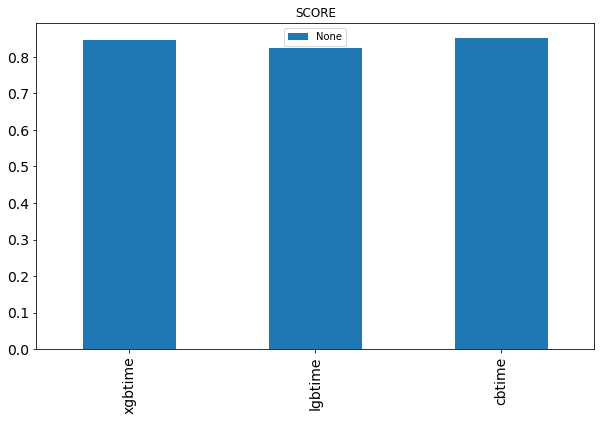

In [18]:
graph1.plot(kind='bar', title ="SCORE", figsize=(10, 6), legend=True, fontsize=14, stacked=True)
print(graph1)

xgbscore    0.010051
lgbscore    0.133625
cbscore     8.551060
dtype: float64


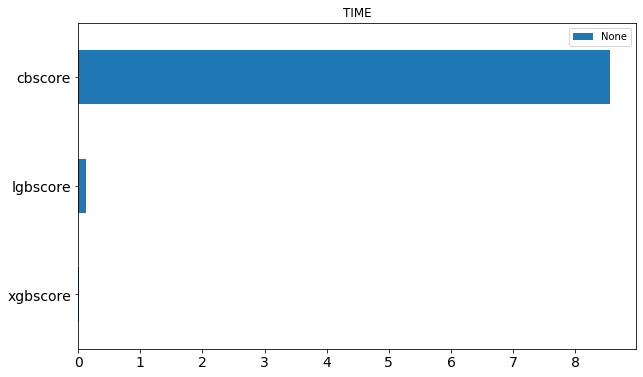

In [19]:
graph2.plot(kind='barh', title ="TIME", figsize=(10, 6), legend=True, fontsize=14, stacked=True)
print(graph2)